# Credit EDA Case Study

###### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

 

Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Importing Libraries 

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt,itertools

## Importing Data

In [2]:
curr_app=pd.read_csv("C://Users//Nmahanta//Downloads//application_data.csv")
prev_app=pd.read_csv("C://Users//Nmahanta//Downloads//previous_application.csv")

## Data Dimentions

In [3]:
print ("Current Application     :",curr_app.shape)
print ("Previous Application    :",prev_app.shape)

Current Application     : (307511, 122)
Previous Application    : (1048575, 37)


## Data before Processing

In [4]:
pd.set_option('display.max_columns', 100)
display("Current Application")
display(curr_app.head(3))
display("Previous Application")
display(prev_app.head(3))

'Current Application'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


'Previous Application'

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


## Relation Between the files

###### SK_ID_CURR

## Missing Values Analysis for Current Application Details

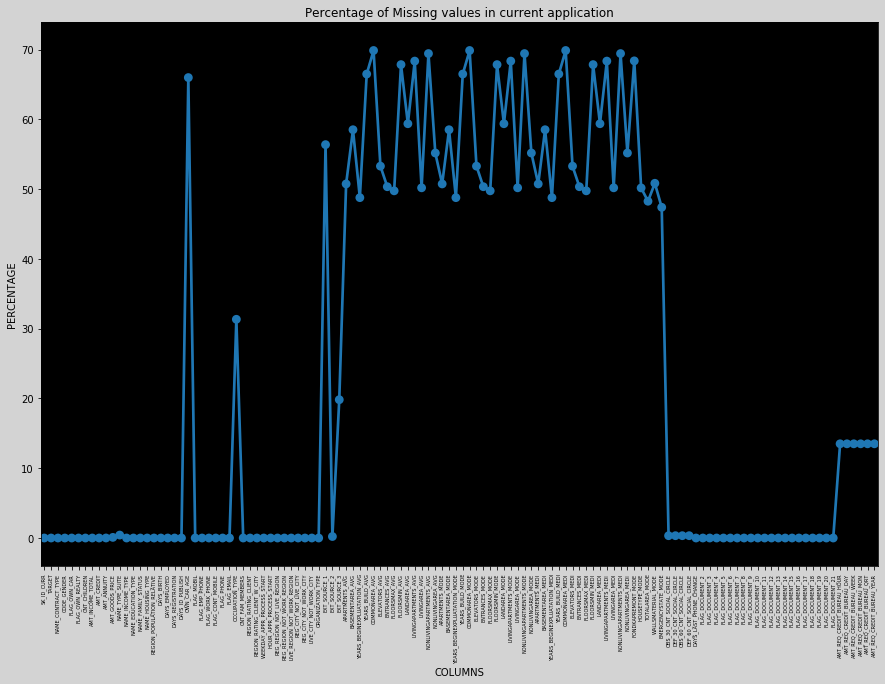

In [5]:
fig = plt.figure(figsize=(15,10))
fig.set_facecolor("lightgrey")
missing=pd.DataFrame((curr_app.isnull().sum())*100/curr_app.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=missing)
plt.xticks(rotation =90,fontsize =5)
plt.title("Percentage of Missing values in current application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")

#### Dropping all Columns that have missing Data more than 40%

In [6]:
curr_app=curr_app[missing['index'][missing[0]<40]]

In [7]:
curr_app.shape

(307511, 73)

###### Fixing columns with null percentage values between 1 to 40

In [8]:
missing[(missing[0]>1) & (missing[0]<40)]

,index,0
28,OCCUPATION_TYPE,31.345545
43,EXT_SOURCE_3,19.825307
116,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
121,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631


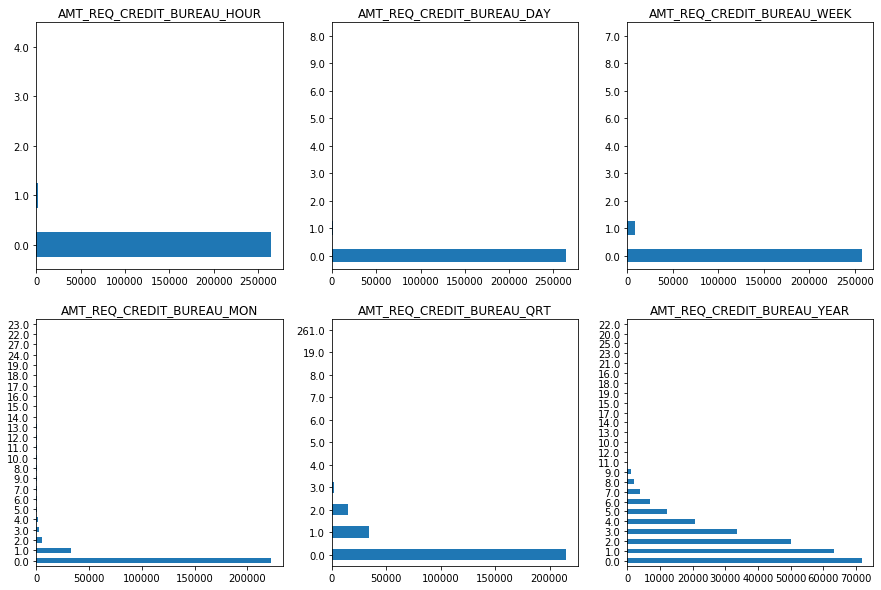

In [9]:
#Looking at credit bureau data which has missing data just above 13%:

plt.figure(figsize=(15,10))
plt.subplot(231)
curr_app["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts().plot(kind="barh")
plt.title("AMT_REQ_CREDIT_BUREAU_HOUR")


plt.subplot(232)
curr_app["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts().plot(kind="barh")
plt.title("AMT_REQ_CREDIT_BUREAU_DAY")

plt.subplot(233)
curr_app["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts().plot(kind="barh")
plt.title("AMT_REQ_CREDIT_BUREAU_WEEK")

plt.subplot(234)
curr_app["AMT_REQ_CREDIT_BUREAU_MON"].value_counts().plot(kind="barh")
plt.title("AMT_REQ_CREDIT_BUREAU_MON")

plt.subplot(235)
curr_app["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts().plot(kind="barh")
plt.title("AMT_REQ_CREDIT_BUREAU_QRT")

plt.subplot(236)
curr_app["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts().plot(kind="barh")
plt.title("AMT_REQ_CREDIT_BUREAU_YEAR")


plt.show()


In [10]:
#In the above graphs, If we see the values distributions, 5 out of 6 columns can have null values filled with 
#respective Modes of the distribution which is 0.0. Lets fill those in assume that no enquiry was made during the time reflected in null rows.!!


for i in curr_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_QRT'].columns:
    curr_app[i].fillna(0,inplace=True)

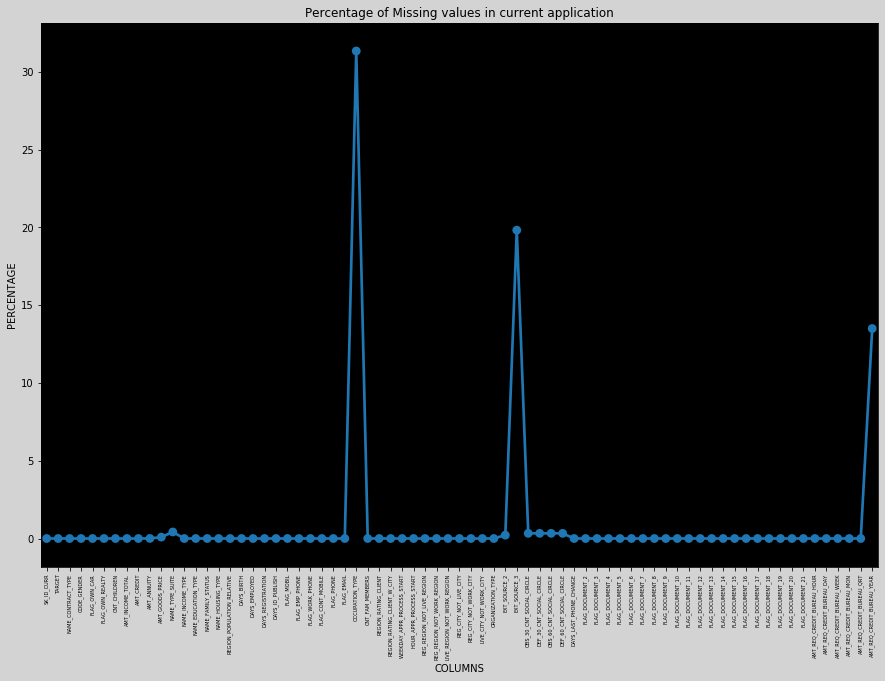

In [11]:
#Lets check out the missing values across the data again!!

fig = plt.figure(figsize=(15,10))
fig.set_facecolor("lightgrey")
missing=pd.DataFrame((curr_app.isnull().sum())*100/curr_app.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=missing)
plt.xticks(rotation =90,fontsize =5)
plt.title("Percentage of Missing values in current application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")

There are 3 columns which have significantly higher values
1. Occupation Type
2. EX_SOURCE_3
3. AMT_REQ_CREDIT_BUREAU_YEAR

Since these columns are important for our analysis and the data seems to be distributed well, We won't be able to impute any values!! If this was data from industry, We would have gone back to application team or concerned team that gave us data to find the reason behind missing values!!

###### Data types of the columns and Converting them into appropriate data types

In [12]:
curr_app.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

In [13]:
curr_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

###### Converting columns to categories for better analysis

Looking at the column names we can see that few of the columns are categories yet are represented as object or integers!!

In [14]:
curr_app.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [15]:
curr_app.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

Notice that a lot of columns with "int" or "object" as datatype has very less unique values. These are either flags or Flag type varibles which have only 2 categories and can be converted to Yes/No values for categorical analysis or signify more 3 categorical values 

###### Converting Negative values in some columns to positives

Looking at content of few columns with respect to age, Such columns are often into negative values!! 


In [16]:
curr_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head(5)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


Lets convert them into positives!!

In [17]:
for i in ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    curr_app[i]=abs(curr_app[i])

curr_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head(5)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


### Outlier Detection and analysis

###### AMT_INCOME_TOTAL

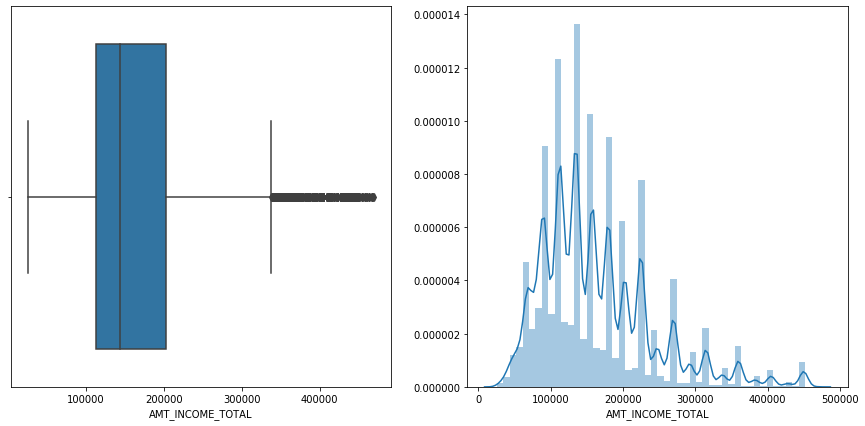

In [18]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.boxplot(curr_app[curr_app['AMT_INCOME_TOTAL']<np.percentile(curr_app['AMT_INCOME_TOTAL'],99)]['AMT_INCOME_TOTAL'])
plt.subplot(122)
sns.distplot(curr_app[curr_app['AMT_INCOME_TOTAL']<np.percentile(curr_app['AMT_INCOME_TOTAL'],99)]['AMT_INCOME_TOTAL'])
plt.show()

In [19]:
curr_app[curr_app['AMT_INCOME_TOTAL']>np.percentile(curr_app['AMT_INCOME_TOTAL'],99)].shape

(3014, 73)

In [20]:
np.percentile(curr_app['AMT_INCOME_TOTAL'],99)

472500.0

As we can see from the above data, There are around 3014 rows that hugely deviate from the main chunk of data. which is apparently 99th percentile of the data

##### AMT_CREDIT

In [21]:
curr_app[curr_app['AMT_CREDIT'] > np.percentile(curr_app['AMT_CREDIT'],99)].shape

(3075, 73)

As we can see from the above data, There are around 3014 rows that hugely deviate from the main chunk of data. which is apparently 99th percentile of the data

##### AMT_ANNUITY

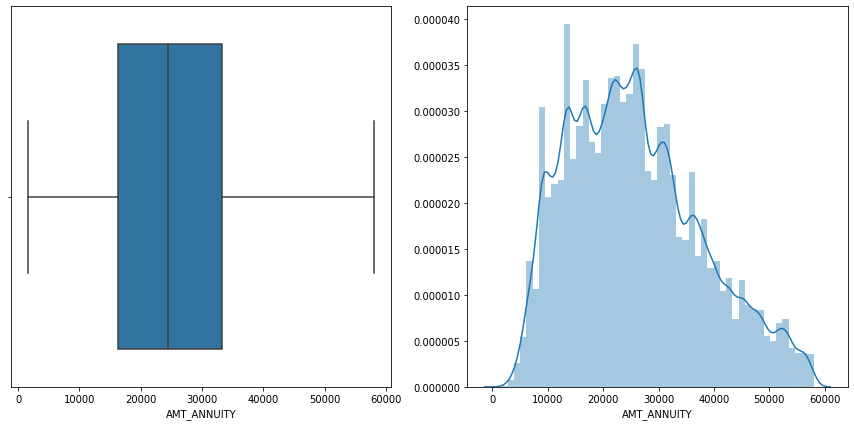

In [22]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.boxplot(curr_app[curr_app['AMT_ANNUITY']<58000]['AMT_ANNUITY'])
plt.subplot(122)
sns.distplot(curr_app[curr_app['AMT_ANNUITY']<58000]['AMT_ANNUITY'])
plt.show()

In [23]:
curr_app[curr_app['AMT_ANNUITY'] > 58000].shape

(9600, 73)

As we can see from the above data, There are around 9600 rows that deviate from the main chunk of data. which is apparently 97th percentile of the data.

##### AMT_GOODS_PRICE

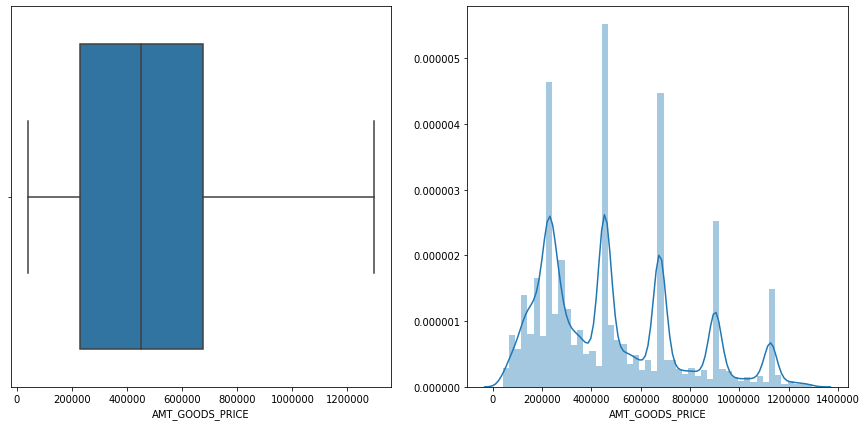

In [24]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.boxplot(curr_app[curr_app['AMT_GOODS_PRICE']<1300000]['AMT_GOODS_PRICE'])
plt.subplot(122)
sns.distplot(curr_app[curr_app['AMT_GOODS_PRICE']<1300000]['AMT_GOODS_PRICE'])
plt.show()

In [25]:
curr_app[curr_app['AMT_GOODS_PRICE']>1300000].shape

(15829, 73)

As we can see from the above data, There are around 15829 rows that deviate from the main chunk of data. which is apparently 95th percentile of the data.

##### DAYS_EMPLOYED

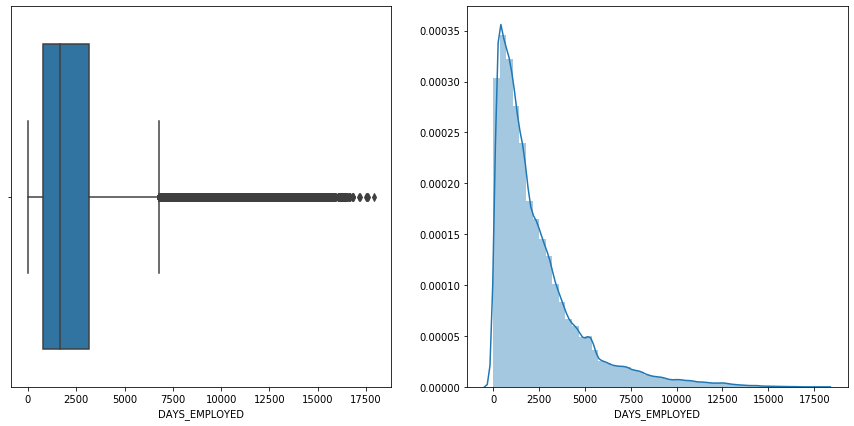

In [26]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.boxplot(curr_app[curr_app['DAYS_EMPLOYED']<350000]['DAYS_EMPLOYED'])
plt.subplot(122)
sns.distplot(curr_app[curr_app['DAYS_EMPLOYED']<350000]['DAYS_EMPLOYED'])
plt.show()

In [27]:
curr_app[curr_app['DAYS_EMPLOYED']>365000].shape

(55374, 73)

The days employed columns has some interesting values that are not possible in real life scenario. Like some people have days employed greater than 365000 which is like 100 years. Hence all of such values are mostly incorrect and can be considered outliers. 

## Check Imbalance percentage. No Balancing Technique required.

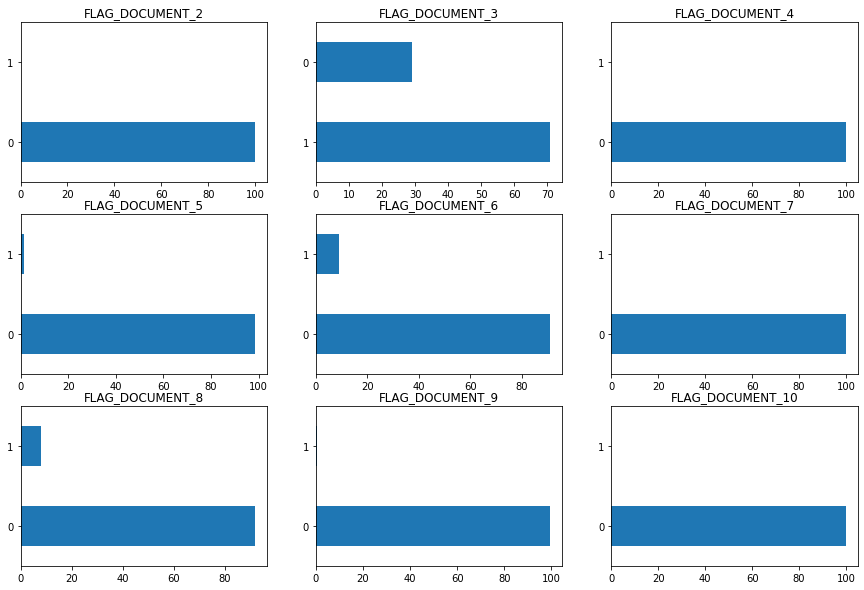

In [28]:
#Lets check out Flag document columns according to the distribution percentages here 

plt.figure(figsize=(15,10))

for i in range(2,11):
    plt.subplot(int("33"+str(i-1)))
    (100*curr_app["FLAG_DOCUMENT_"+str(i)].value_counts(normalize=True)).plot(kind="barh")
    plt.title("FLAG_DOCUMENT_"+str(i))

### Dividing the dataset into 2 smaller datasets based on values of Target column 
1- The client with payment difficulties or Defaulters, 
0- All other cases or Repayers

In [29]:
curr_app1=curr_app[curr_app['TARGET']==1]
curr_app0=curr_app[curr_app['TARGET']==0]

### Finding out Correlation of various columns

Let us check out few amount columns and days columns for the correlation between them using Heatmap

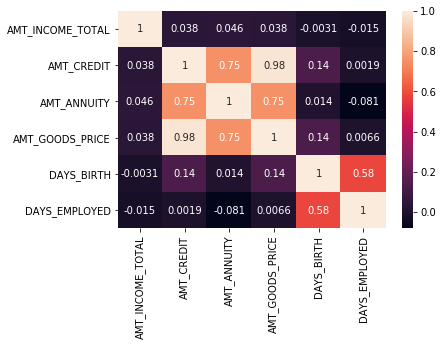

In [30]:
sns.heatmap(curr_app1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']].corr(),annot=True)
plt.show()

As we can from above heat map, few columns have very high correlation while others have very low. Some also have negative correlation. To find out correlation between all columns as such using heatmap is a messy task. Lets code to get top 10 correlations and sort them with higher correlations first

In [31]:
corr=curr_app.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.abs().unstack().reset_index()
corr_df.columns=['var1','var2','correlation']
corr_df.correlation=round(corr_df.correlation*100,2)
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df.sort_values('correlation',ascending=False).head(10)

,var1,var2,correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,99.98
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,99.85
370,AMT_GOODS_PRICE,AMT_CREDIT,98.70
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,95.08
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,87.92
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,86.06
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,86.05
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,82.56
371,AMT_GOODS_PRICE,AMT_ANNUITY,77.51
309,AMT_ANNUITY,AMT_CREDIT,77.01


Can we compare the correlations of columns of our defaulter as well as repayer Datasets? Yes!! We can!! Below are the results!

In [32]:
##Correlation of Repayers:

corr=curr_app0.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.abs().unstack().reset_index()
corr_df.columns=['var1','var2','correlation']
corr_df.correlation=round(corr_df.correlation*100,2)
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df.sort_values('correlation',ascending=False).head(10)

,var1,var2,correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,99.98
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,99.85
370,AMT_GOODS_PRICE,AMT_CREDIT,98.73
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,95.01
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,87.86
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,86.19
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,85.93
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,83.04
371,AMT_GOODS_PRICE,AMT_ANNUITY,77.67
309,AMT_ANNUITY,AMT_CREDIT,77.13


In [33]:
##Correlation of Defaulters:

corr=curr_app1.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.abs().unstack().reset_index()
corr_df.columns=['var1','var2','correlation']
corr_df.correlation=round(corr_df.correlation*100,2)
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df.sort_values('correlation',ascending=False).head(10)

,var1,var2,correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,99.97
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,99.83
370,AMT_GOODS_PRICE,AMT_CREDIT,98.31
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,95.66
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,88.55
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,86.90
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,84.79
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,77.85
371,AMT_GOODS_PRICE,AMT_ANNUITY,75.27
309,AMT_ANNUITY,AMT_CREDIT,75.22


As we can see from above two Top 10 correlation tables, We find that correlations of both new formed datasets are similar in nature!! Let us start with analysis of individual columns!! 

## Univariate analysis on Continous variables

#### Distribution of target variable

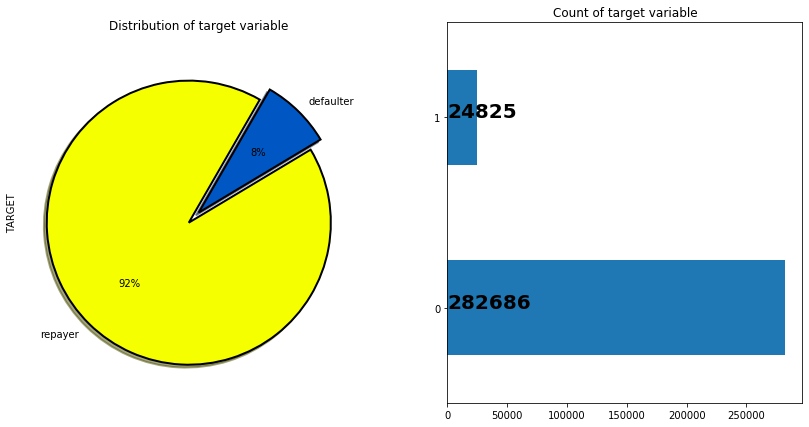

In [34]:
plt.figure(figsize=(14,7))
plt.subplot(121)
curr_app["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = curr_app["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(curr_app["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

#TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)
#8% out of total client population have difficulties in repaying loans.


#### Comparison of Different amounts in the dataset across Target variable

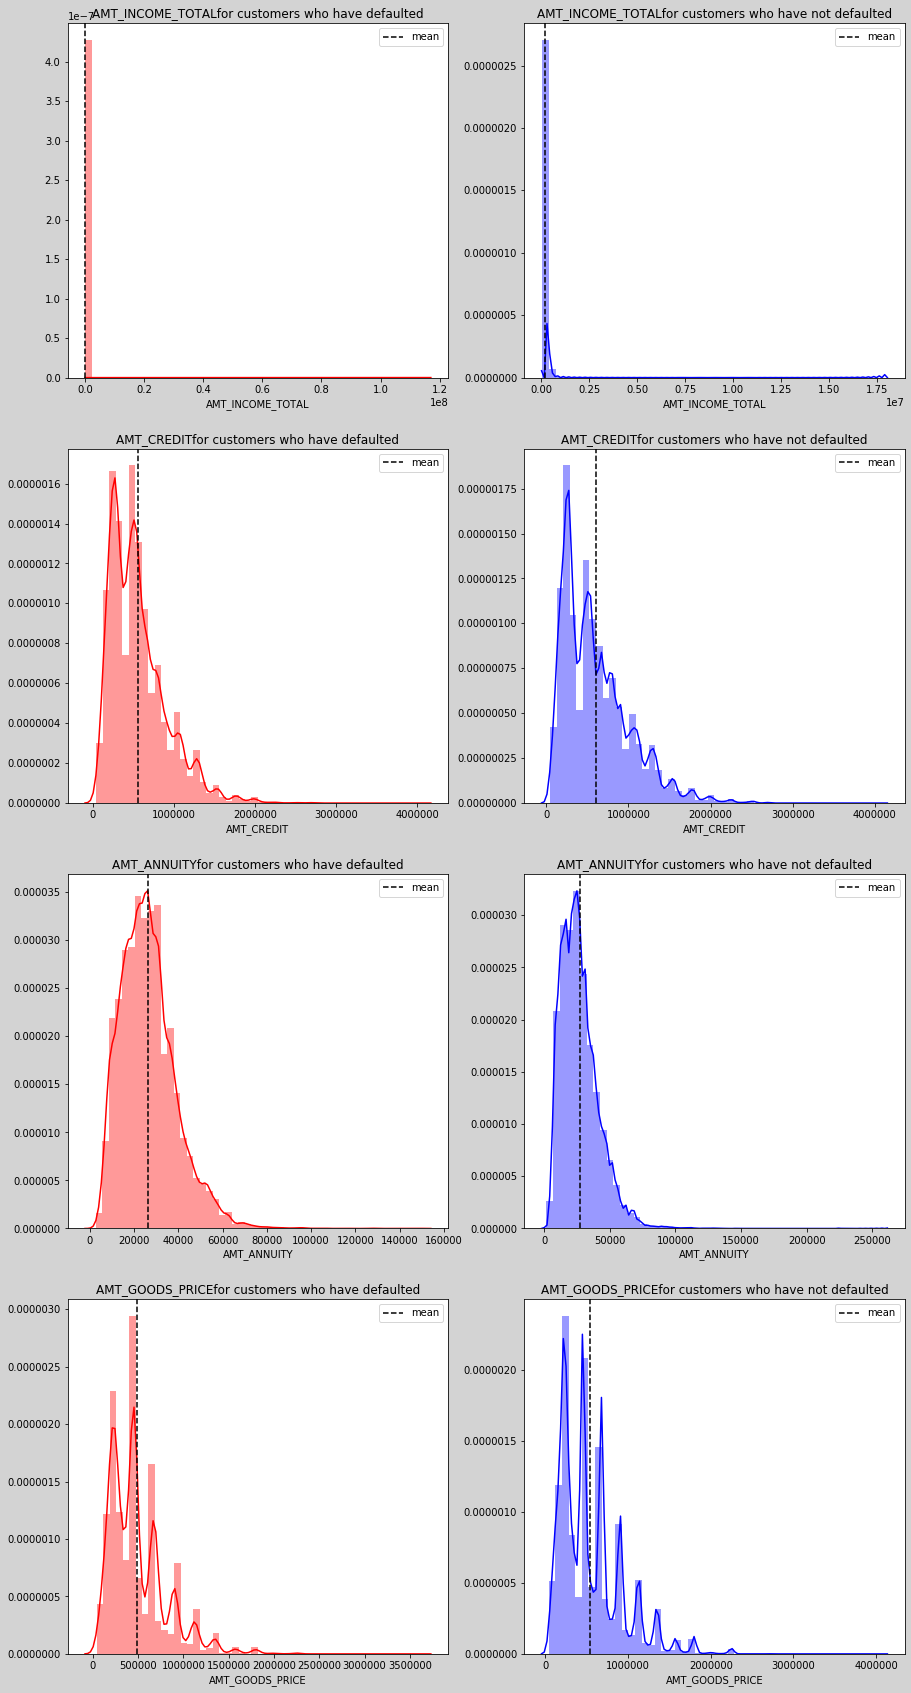

In [35]:
cols = [ 'AMT_INCOME_TOTAL','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_CREDIT','AMT_ANNUITY', 'AMT_ANNUITY','AMT_GOODS_PRICE','AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(15,30))
ax.set_facecolor("lightgrey")
count=1
for i in cols:
    plt.subplot(4,2,count)
    if count%2==1:
        sns.distplot(curr_app1[curr_app1[i].notnull()][i],color='r')
        plt.axvline(curr_app1[i].mean(),label = "mean",linestyle="dashed",color='k')
        plt.title(i+ "for customers who have defaulted")
    else:
        sns.distplot(curr_app0[curr_app0[i].notnull()][i],color='b')
        plt.axvline(curr_app0[i].mean(),label = "mean",linestyle="dashed",color='k')
        plt.title(i + "for customers who have not defaulted")
    count+=1
    plt.legend(loc="best")
    plt.subplots_adjust(hspace = .2)

    

We are not able to observe much from the above graphs. Hence lets check their statistics comparison below

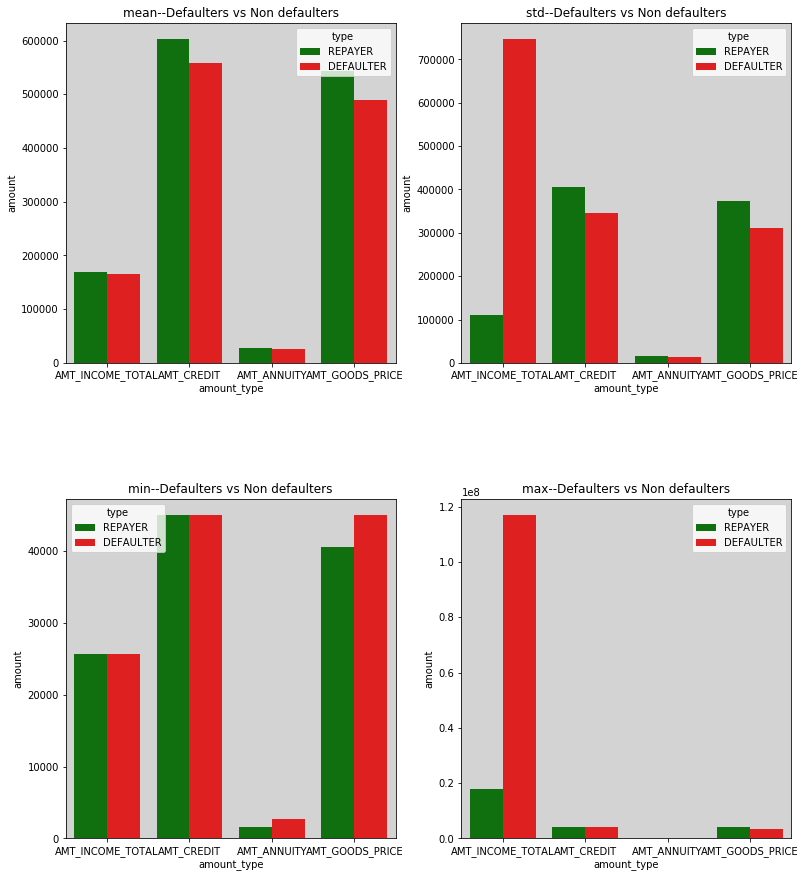

In [36]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df = curr_app.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

In column of Income of client,
1 . average income of clients who default and who do not are almost same.
2 . standard deviation in income of client who default is very high compared to who do not default.
3 . clients who default also has maximum income earnings

In columns of Credit amount of the loan ,Loan annuity,Amount goods price,
1 .statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

#### Distribution normalized population of region where client lives by loan repayment status

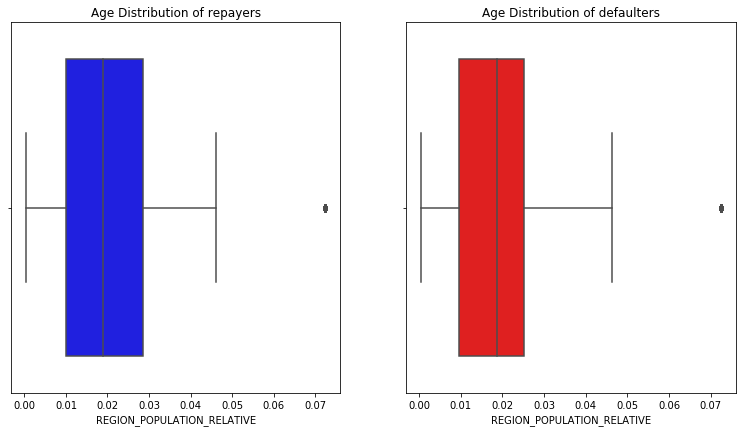

In [37]:
fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.boxplot(abs(curr_app0["REGION_POPULATION_RELATIVE"]),color ="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.boxplot(abs(curr_app1["REGION_POPULATION_RELATIVE"]),color="r")
plt.title("Age Distribution of defaulters")
plt.show()

In High population density regions people are less likely to default on loans.

#### Age Distribution across Target variables

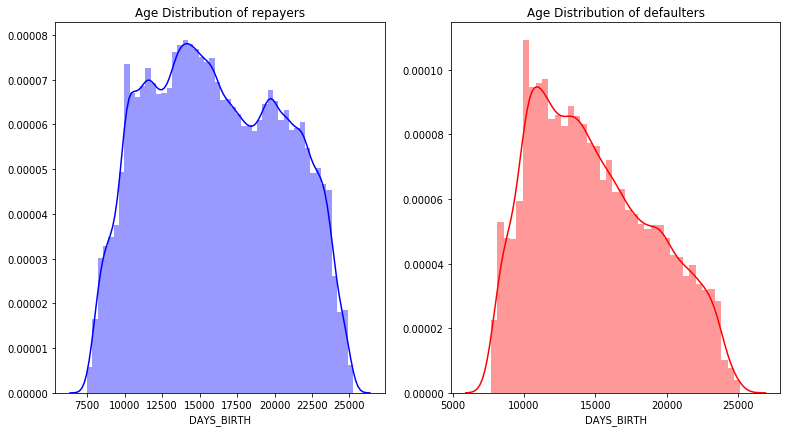

In [38]:
fig = plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(curr_app0["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(curr_app1["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")
plt.show()

In above graphs, average clients age is comparatively less in non repayers than repayers in every aspect and younger people tend to default more than elder people.

#### Credit bureau Columns across Target variable values

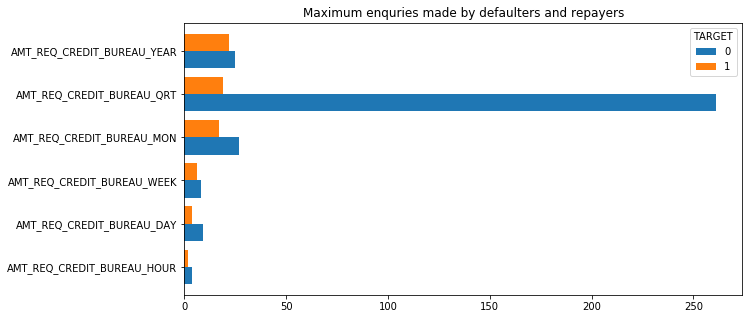

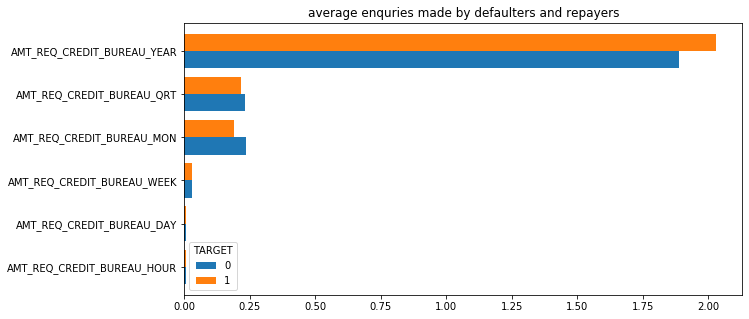

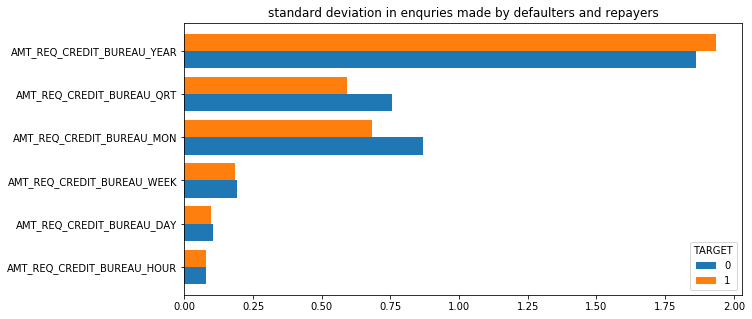

In [39]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
curr_app.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
curr_app.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
curr_app.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()


## Univariate analysis of Categorical Variables

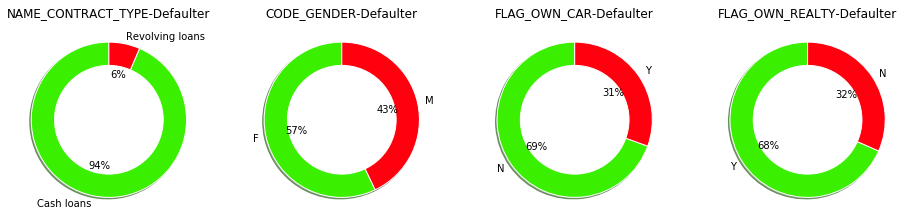

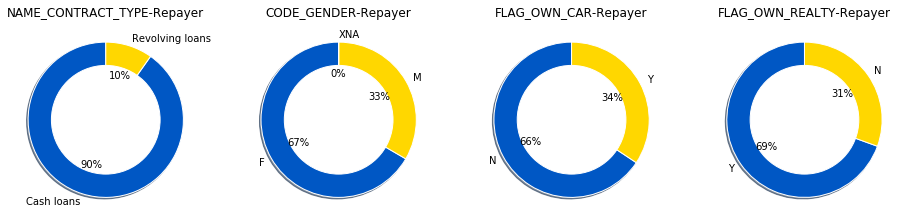

In [40]:
d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    curr_app1[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    curr_app0[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

Percentage of males is 10% more in defaults than non defaulters.

#### Distribution of Education Type Across Target variable

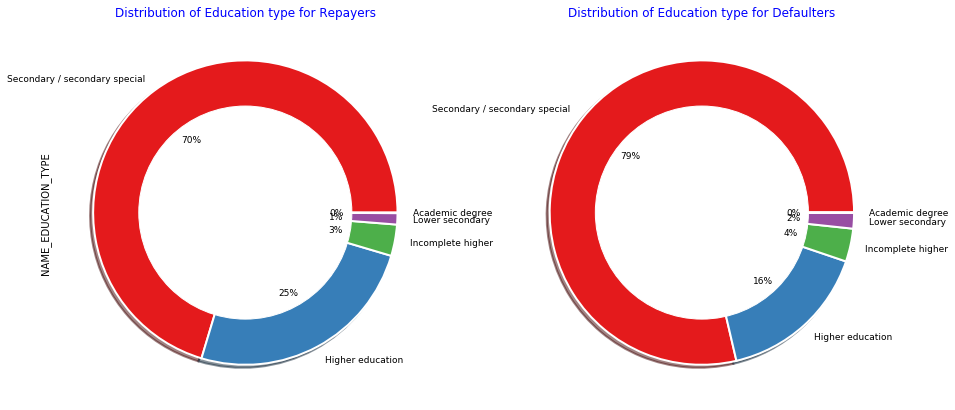

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(121)
curr_app0["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",colors = sns.color_palette("Set1"),
wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
curr_app1["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=9,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

Column "NAME_EDUCATION_TYPE" represents Level of highest education the client achieved. AS we see from above graphs, Clients who default have proportionally 9% less higher education compared to clients who do not default.

#### Distribution of Occupation Type Across Target variable

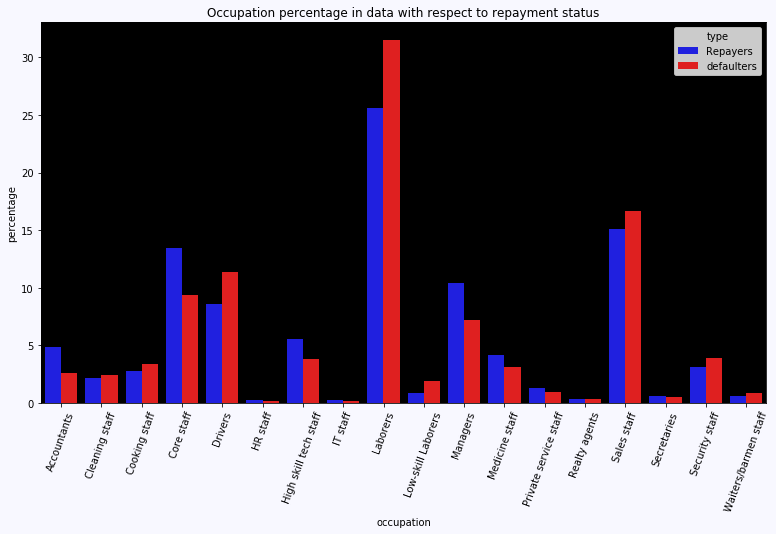

In [42]:
fig = plt.figure(figsize=(13,7))
occ = curr_app0["OCCUPATION_TYPE"].value_counts().reset_index()
occ = occ.sort_values(by = "index",ascending=True)
occ1 = curr_app1["OCCUPATION_TYPE"].value_counts().reset_index()
occ1 = occ1.sort_values(by = "index",ascending=True)
occ["percentage"]  = (occ["OCCUPATION_TYPE"]*100/occ["OCCUPATION_TYPE"].sum())
occ1["percentage"] = (occ1["OCCUPATION_TYPE"]*100/occ1["OCCUPATION_TYPE"].sum())
occ["type"]        = "Repayers"
occ1["type"]       = "defaulters"
occupation = pd.concat([occ,occ1],axis=0)

ax = sns.barplot("index","percentage",data=occupation,hue="type",palette=["b","r"])
plt.xticks(rotation = 70)
plt.xlabel("occupation")
ax.set_facecolor("k")
fig.set_facecolor("ghostwhite")
plt.title("Occupation percentage in data with respect to repayment status")
plt.show()

occupations like Cleaning staff ,Cooking staff, Drivers ,Laborers , Low-skill Laborers ,Sales staff ,Security staff are more likely to default in loans.

#### Distribution of Occupation Type Across Target variable

C:\Users\Nmahanta\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Nmahanta\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


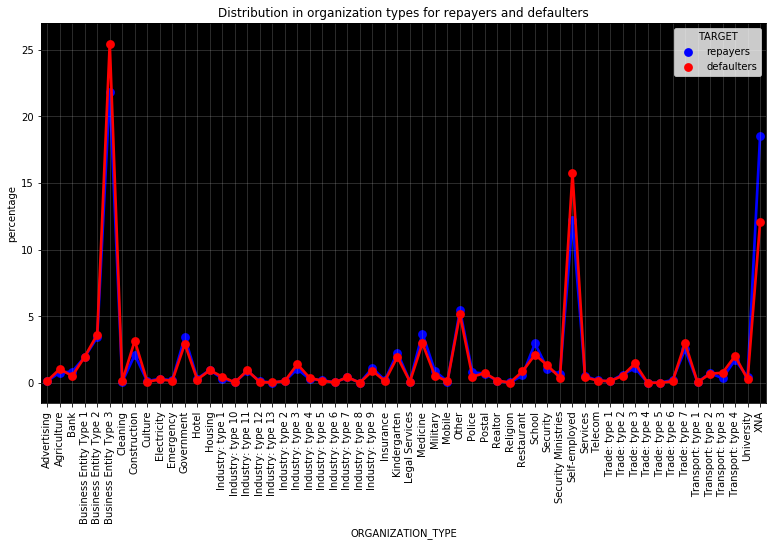

In [43]:
org = curr_app.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage",
                   data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

organizations like Business Entity Type 3,Construction,Self-employed percentage of defaulters are higher than repayers.

## Bivariate Analysis of 2 Continous variables


#### Distribution of Annuity amount and Credit amount across Target column 

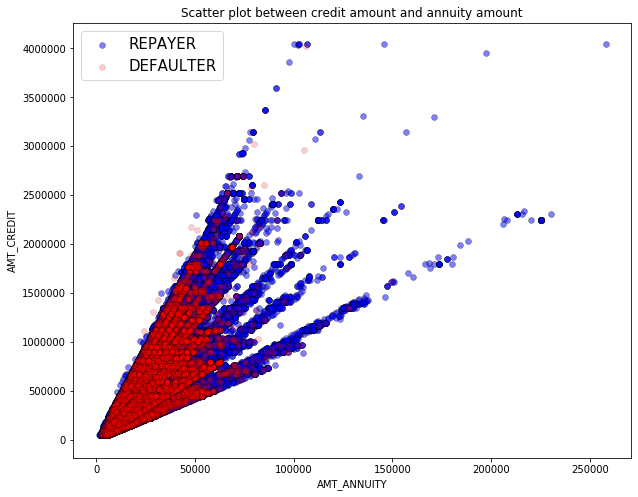

In [44]:
fig = plt.figure(figsize=(10,8))
plt.scatter(curr_app0['AMT_ANNUITY'],curr_app0['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(curr_app1['AMT_ANNUITY'],curr_app1['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

#### Pair Plot between amount columns and Target column

<Figure size 720x720 with 0 Axes>

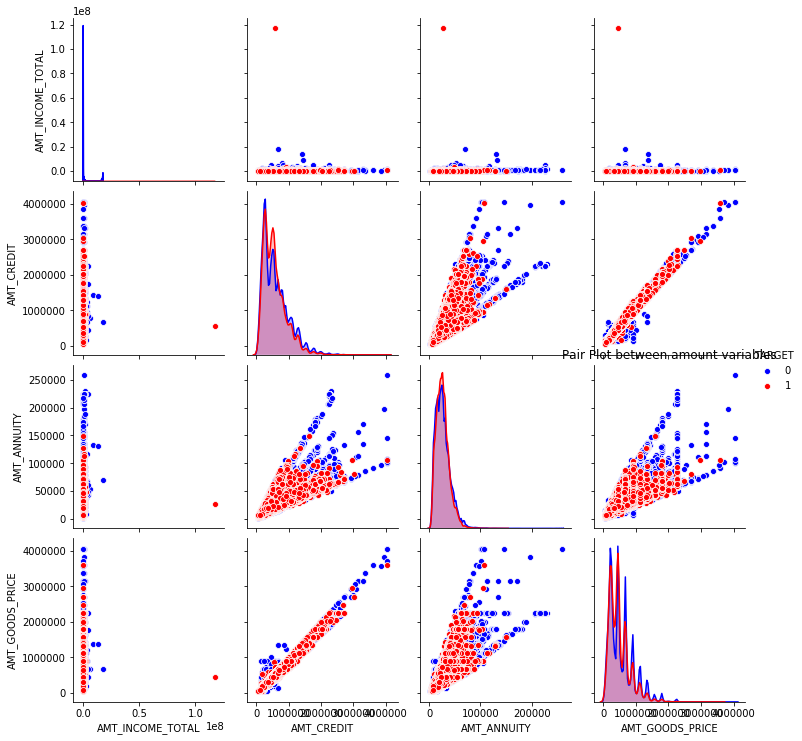

In [45]:
fig = plt.figure(figsize=(10,10))
amt = curr_app[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.title("Pair Plot between amount variables")
plt.show()

## Bivariate Analysis of Continous Variables across Categorical variables


#### Distribution of Amount variables across Gender and Target variables

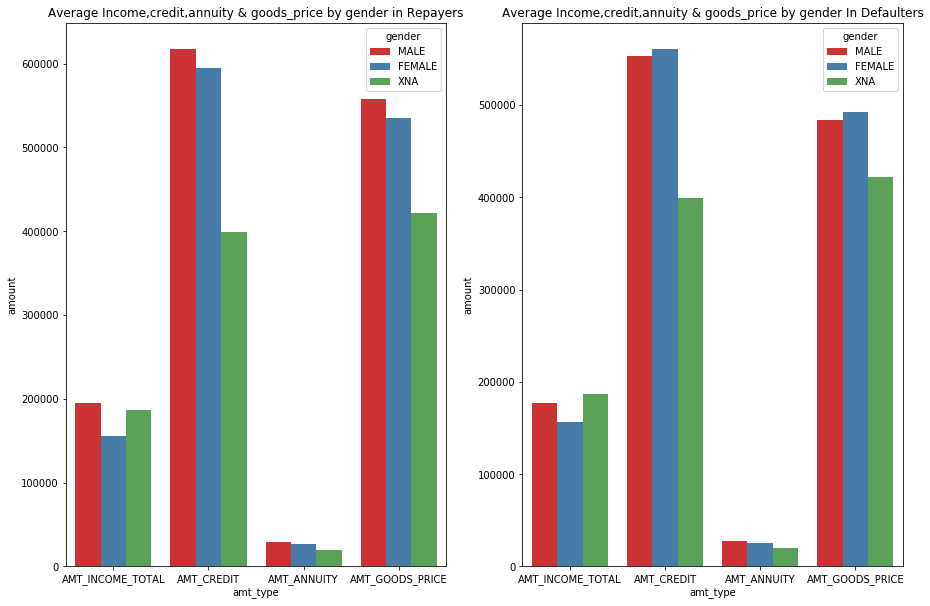

In [46]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']



plt.figure(figsize=(15,10))
plt.subplot(121)
df1 = curr_app0.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender in Repayers")

plt.subplot(122)
df1 = curr_app1.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"


df_gen = pd.concat([df_m,df_f,df_xna],axis=0)
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender In Defaulters")
plt.show() 

#### Average Earnings by different professions and education types for defaulters

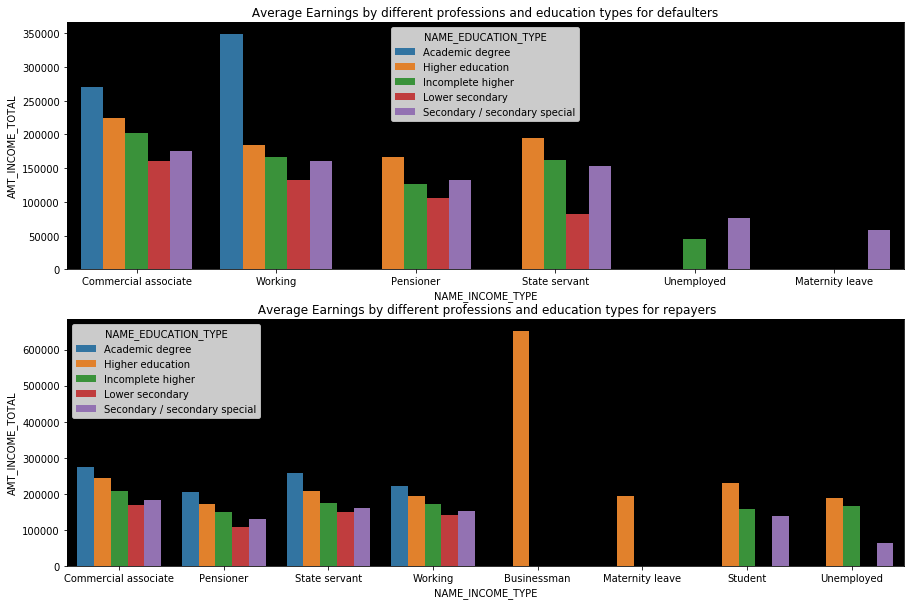

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(211)
edu = curr_app1.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index()
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE')
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types for defaulters ")

plt.subplot(212)
edu = curr_app0.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index()
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE')
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types for repayers")

plt.show()

## Bivariate Analysis of 2 categorical Variables across Target Variable

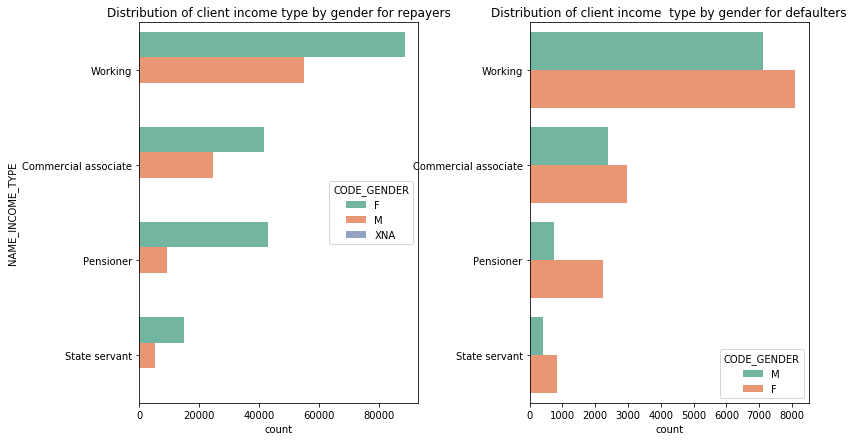

In [48]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(y=curr_app0["NAME_INCOME_TYPE"],
              hue=curr_app0["CODE_GENDER"],
              palette="Set2",
              order=curr_app0["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type by gender for repayers")

plt.subplot(122)
sns.countplot(y=curr_app1["NAME_INCOME_TYPE"],
              hue=curr_app1["CODE_GENDER"],
              palette="Set2",
              order=curr_app1["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender for defaulters")
plt.subplots_adjust(wspace = .4)

#### Distribution of client income  type by gender for defaulters

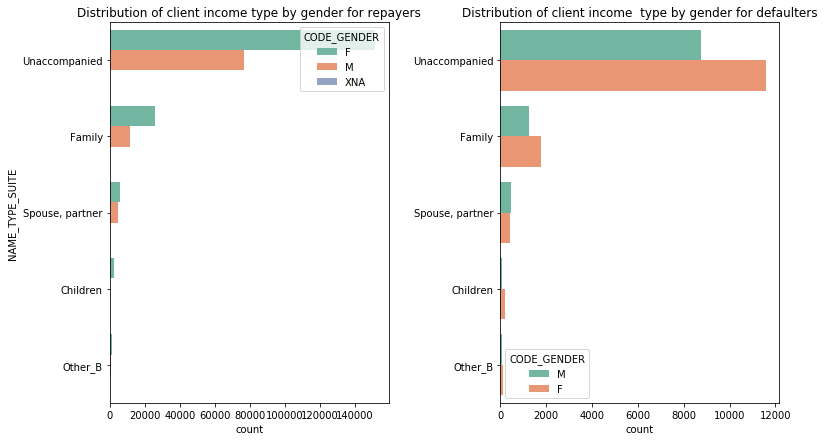

In [49]:
plt.figure(figsize=(12,7))
plt.subplot(121)
sns.countplot(y=curr_app0["NAME_TYPE_SUITE"],
              hue=curr_app0["CODE_GENDER"],palette="Set2",
              order=curr_app0["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of client income type by gender for repayers")

plt.subplot(122)
sns.countplot(y=curr_app1["NAME_TYPE_SUITE"],
              hue=curr_app1["CODE_GENDER"],palette="Set2",
              order=curr_app1["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of client income  type by gender for defaulters")
plt.subplots_adjust(wspace = .4)

## Data Merge with Previous applications from Customer

In [50]:
#all_applications=pd.merge(curr_app,prev_app,how='inner',on='SK_ID_CURR')

In [51]:
#all_applications.head(3)

#### ANALYSIS OF PREVIOUS_DATA

In [52]:
prev_app.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [53]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [54]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
prev_app.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

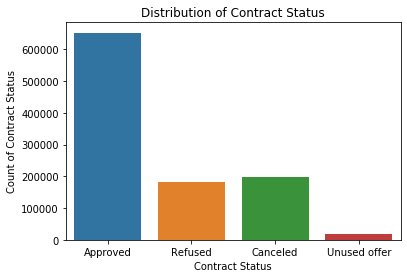

In [56]:
sns.countplot(prev_app.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

Identifying missing values and filtering out columns with high missing values

In [57]:
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [58]:
prev_meta_data=meta_data(prev_app)
prev_meta_data.reset_index(drop=False).head(20)

,index,Total,Percent,Unique,Data_Type
0,RATE_INTEREST_PRIVILEGED,1044854,99.645137,24,float64
1,RATE_INTEREST_PRIMARY,1044854,99.645137,116,float64
2,RATE_DOWN_PAYMENT,559396,53.348211,140327,float64
3,AMT_DOWN_PAYMENT,559396,53.348211,22454,float64
4,NAME_TYPE_SUITE,515140,49.127626,7,object
5,NFLAG_INSURED_ON_APPROVAL,420708,40.121880,2,float64
6,DAYS_FIRST_DRAWING,420708,40.121880,2738,float64
7,DAYS_FIRST_DUE,420708,40.121880,2892,float64
8,DAYS_LAST_DUE_1ST_VERSION,420708,40.121880,4588,float64
9,DAYS_LAST_DUE,420708,40.121880,2867,float64


In [59]:
#dropping columns with more than 55% missing values 
cols_to_keep=list(prev_meta_data[(prev_meta_data.Percent<55)].index)
previous_data=prev_app[cols_to_keep]
previous_data.describe()

,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,SELLERPLACE_AREA,SK_ID_PREV,SK_ID_CURR,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,AMT_CREDIT,AMT_APPLICATION
count,489179.000000,4.891790e+05,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,8.076100e+05,815566.000000,815569.000000,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,0.079619,6.700778e+03,0.331530,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,2.262892e+05,15891.265151,15.995639,3.183904e+02,1.922775e+06,2.784367e+05,-8.820381e+02,9.964123e-01,1.248486e+01,1.950000e+05,1.742698e+05
std,0.107882,2.078570e+04,0.470764,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,3.134490e+05,14745.557438,14.508109,7.996734e+03,5.329366e+05,1.028569e+05,7.792649e+02,5.979011e-02,3.333140e+00,3.169407e+05,2.910789e+05
min,-0.000014,-9.000000e-01,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000e+00,0.000000,0.000000,-1.000000e+00,1.000001e+06,1.000010e+05,-2.922000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,5.058000e+04,6301.350000,6.000000,-1.000000e+00,1.460642e+06,1.893860e+05,-1.303000e+03,1.000000e+00,1.000000e+01,2.427750e+04,1.890000e+04
50%,0.051062,1.624500e+03,0.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,1.115116e+05,11250.000000,12.000000,4.000000e+00,1.923419e+06,2.788100e+05,-5.830000e+02,1.000000e+00,1.200000e+01,8.025300e+04,7.081650e+04
75%,0.108909,7.749000e+03,1.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,2.295000e+05,20523.003750,24.000000,8.500000e+01,2.384448e+06,3.677445e+05,-2.810000e+02,1.000000e+00,1.500000e+01,2.152395e+05,1.800000e+05
max,0.989740,2.150100e+06,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,6.905160e+06,418058.145000,84.000000,4.000000e+06,2.845382e+06,4.562550e+05,-2.000000e+00,1.000000e+00,2.300000e+01,6.905160e+06,6.905160e+06


In [60]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(prev_meta_data[(prev_meta_data.Percent>0)&(prev_meta_data.Percent<15)])
low_missing

,Total,Percent,Unique,Data_Type
PRODUCT_COMBINATION,224,0.021362,17,object


Above column should not be imputed with any values

In [61]:
cols_to_convert=list(prev_meta_data[(prev_meta_data.Unique==2)&((prev_meta_data.Data_Type=="int64")|(prev_meta_data.Data_Type=="float64"))].index)
cols_to_convert

['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY']

In [62]:
def convert_data(prev_app, cols_to_convert):
    for y in cols_to_convert:
        prev_app.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return prev_app
convert_data(prev_app, cols_to_convert)
prev_app.dtypes.value_counts()

object     18
float64    14
int64       5
dtype: int64

In [63]:
approved=prev_app[prev_app.NAME_CONTRACT_STATUS=='Approved']
refused=prev_app[prev_app.NAME_CONTRACT_STATUS=='Refused']
canceled=prev_app[prev_app.NAME_CONTRACT_STATUS=='Canceled']
unused=prev_app[prev_app.NAME_CONTRACT_STATUS=='Unused Offer']

In [64]:
percentage_approved=(len(approved)*100)/len(prev_app)
percentage_refused=(len(refused)*100)/len(prev_app)
percentage_canceled=(len(canceled)*100)/len(prev_app)
percentage_unused=(len(unused)*100)/len(prev_app)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.23 %
The Percentage of people whose loans have been Refused is: 17.36 %
The Percentage of people whose loans have been Canceled is: 18.81 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [65]:
#The Percentage of people whose loans have been Unused is: 0.0 %
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [66]:
prev_app.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### OBSERVATION OF MOST APPROVED,REFUSED AND CANCELLED LOANS ACROSS DIFFERENT CATEGORIES :-

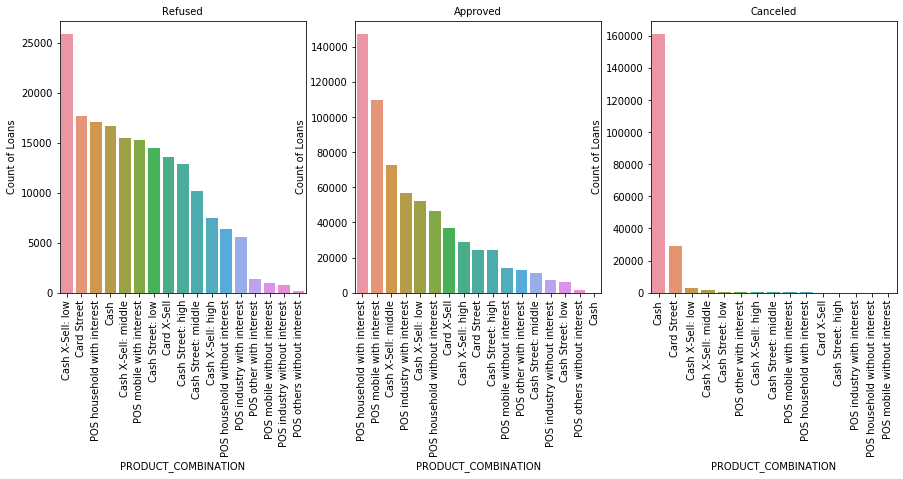

In [67]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

We observe most number of loans were approved for POS household with interest.
Most number of refused loans were of Cash X-Sell: Low Product combination
Most Canceled loans were Cash loans

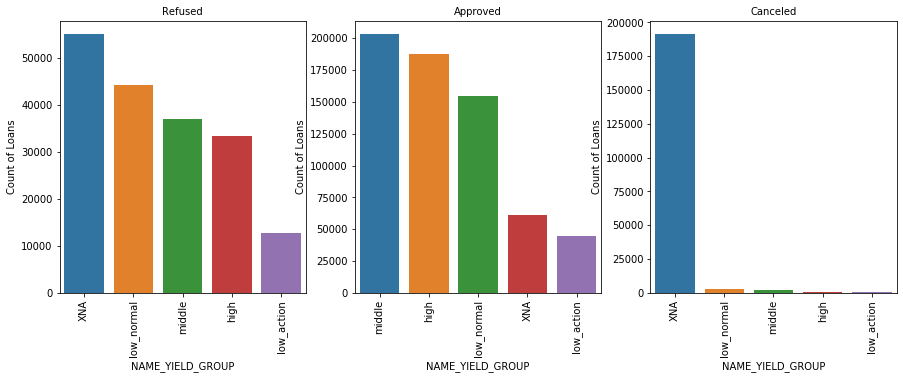

In [68]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

Most approved loans were from Middle Yield Goup
Most refused loans were from Yield Goups Not specified

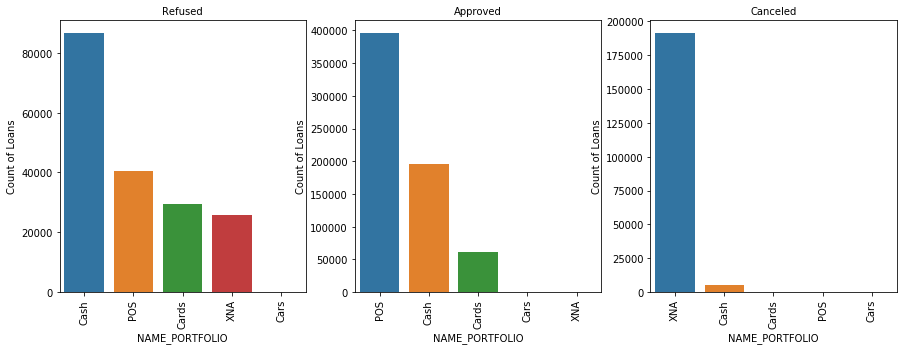

In [69]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

Most approved loans were POS
Most refused loans were Cash

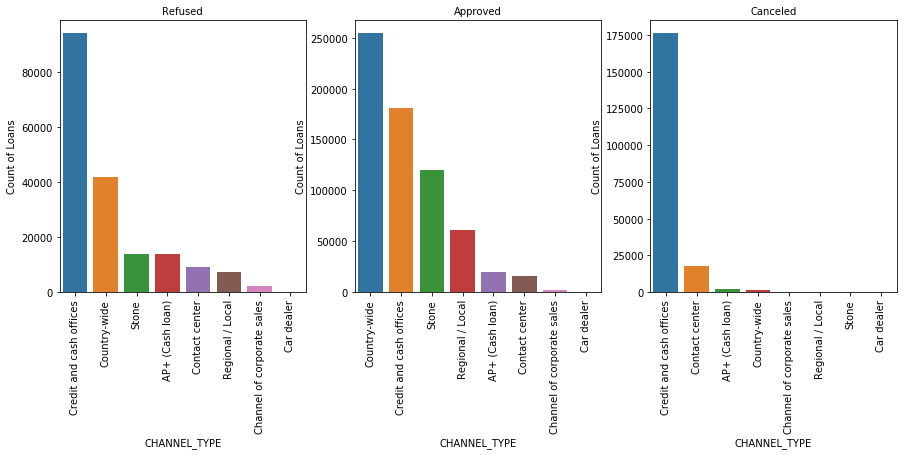

In [70]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

Most approved loans were from Country-wide Channel
Most refused loans were from Credit and Cash Offices Channel

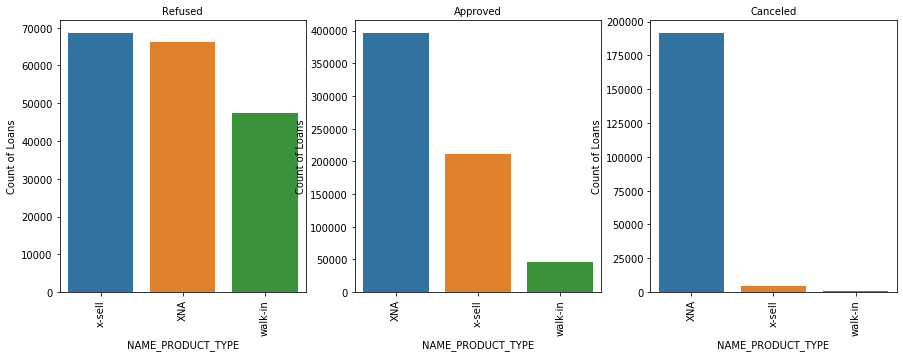

In [71]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

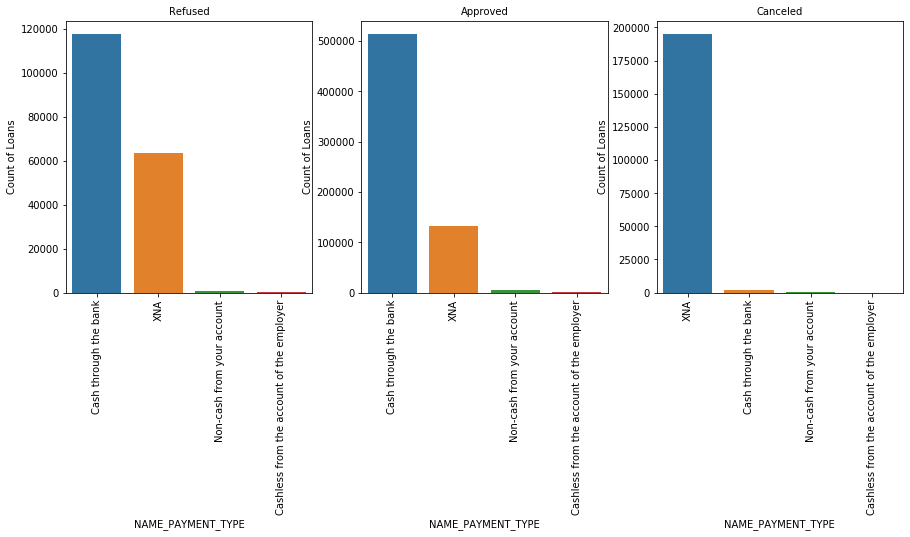

In [72]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

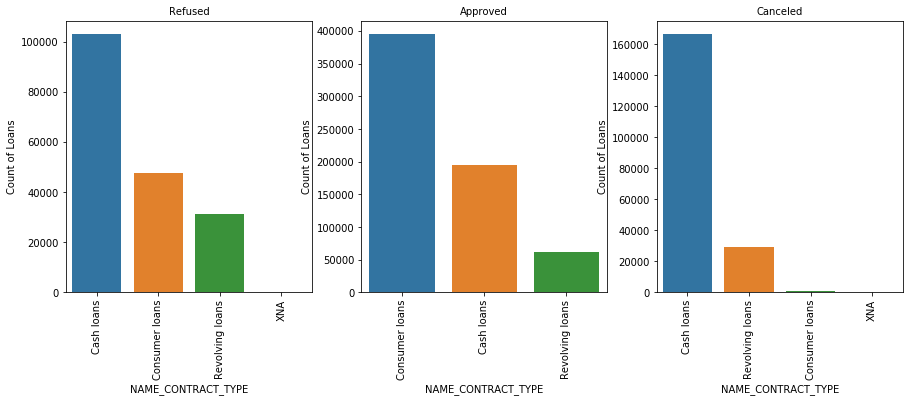

In [73]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

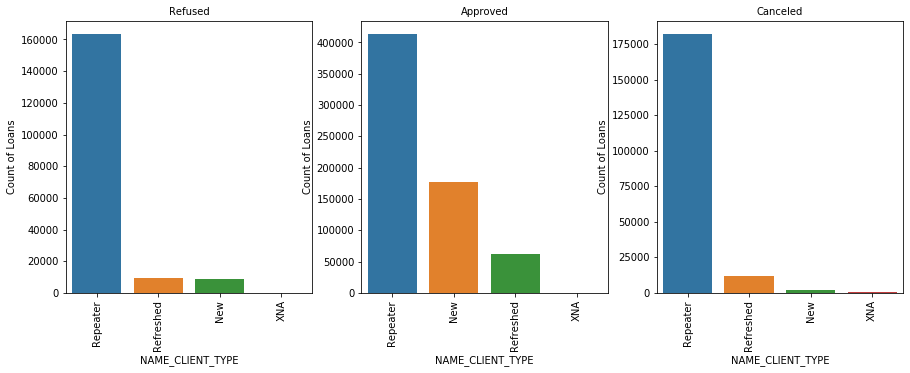

In [74]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

Removing Outliers

C:\Users\Nmahanta\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nmahanta\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


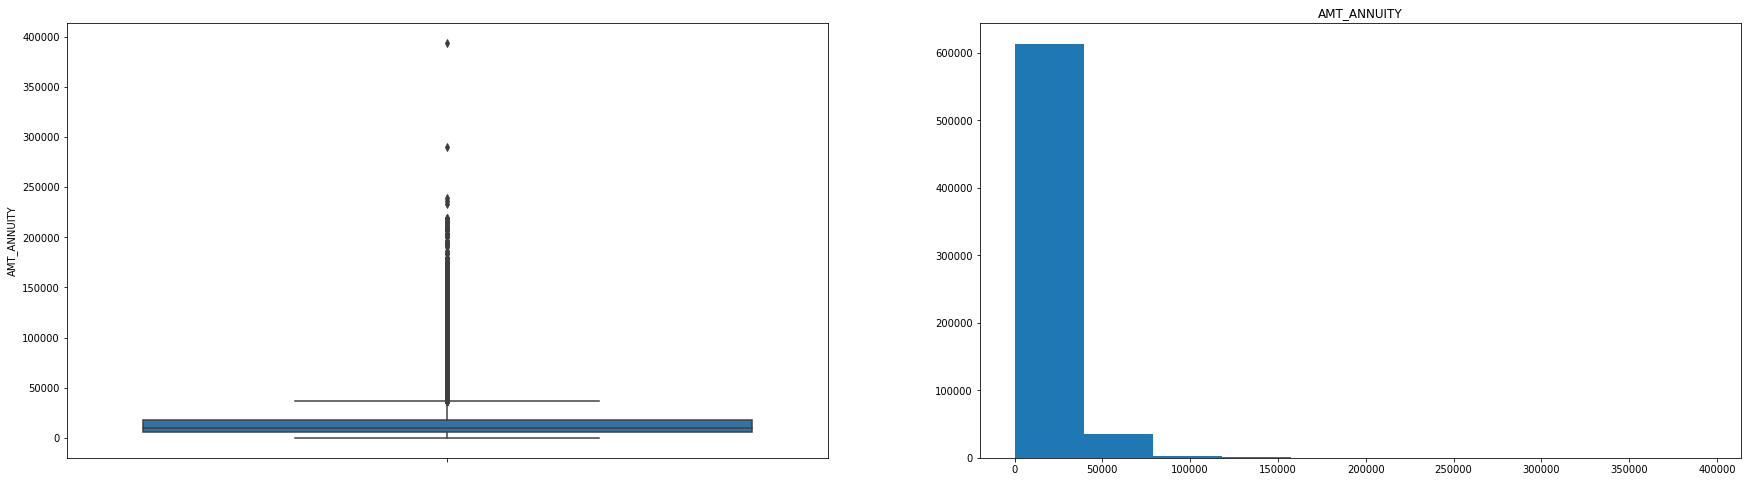

In [76]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

Text(0.5, 1.0, 'AMT_ANNUITY')

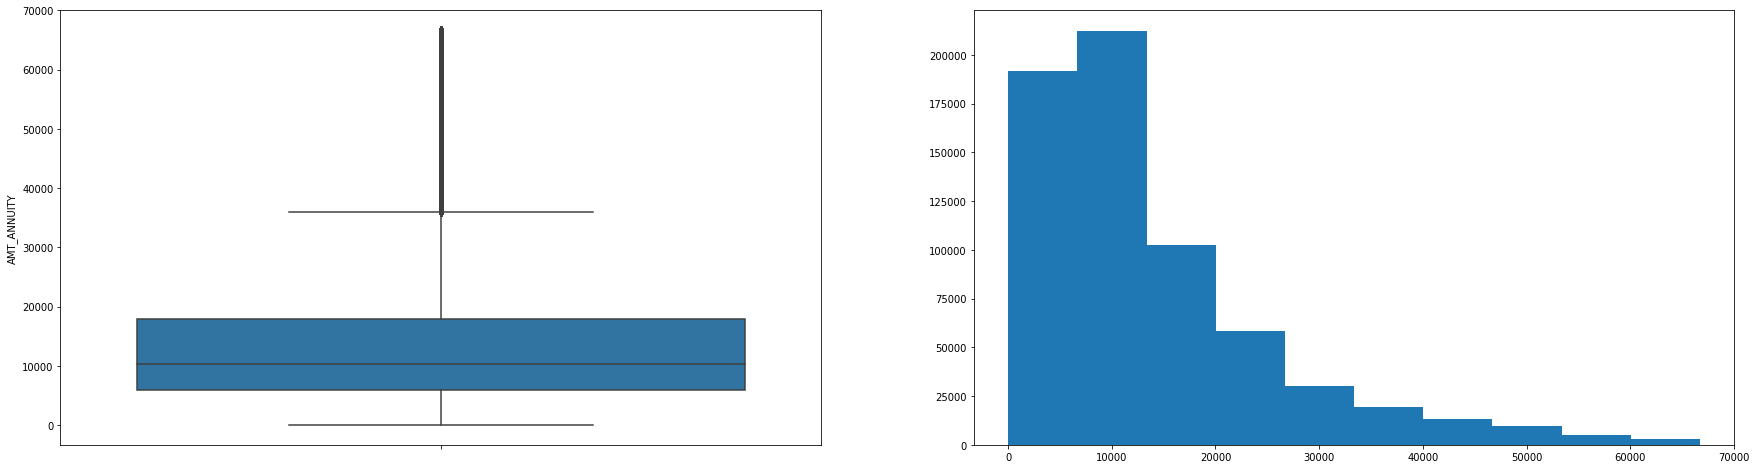

In [77]:
approved=approved[approved.AMT_ANNUITY<np.nanpercentile(approved['AMT_ANNUITY'], 99)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_ANNUITY boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
ax.set_title('AMT_ANNUITY')

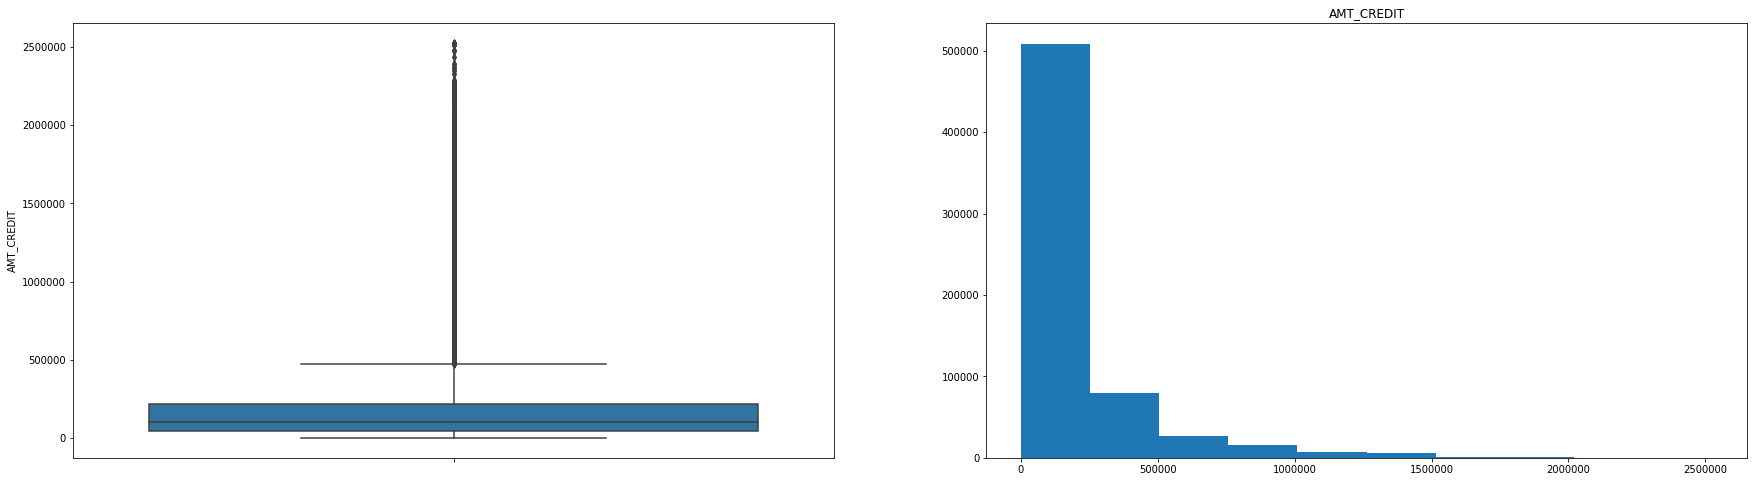

In [78]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

Text(0.5, 1.0, 'AMT_CREDIT')

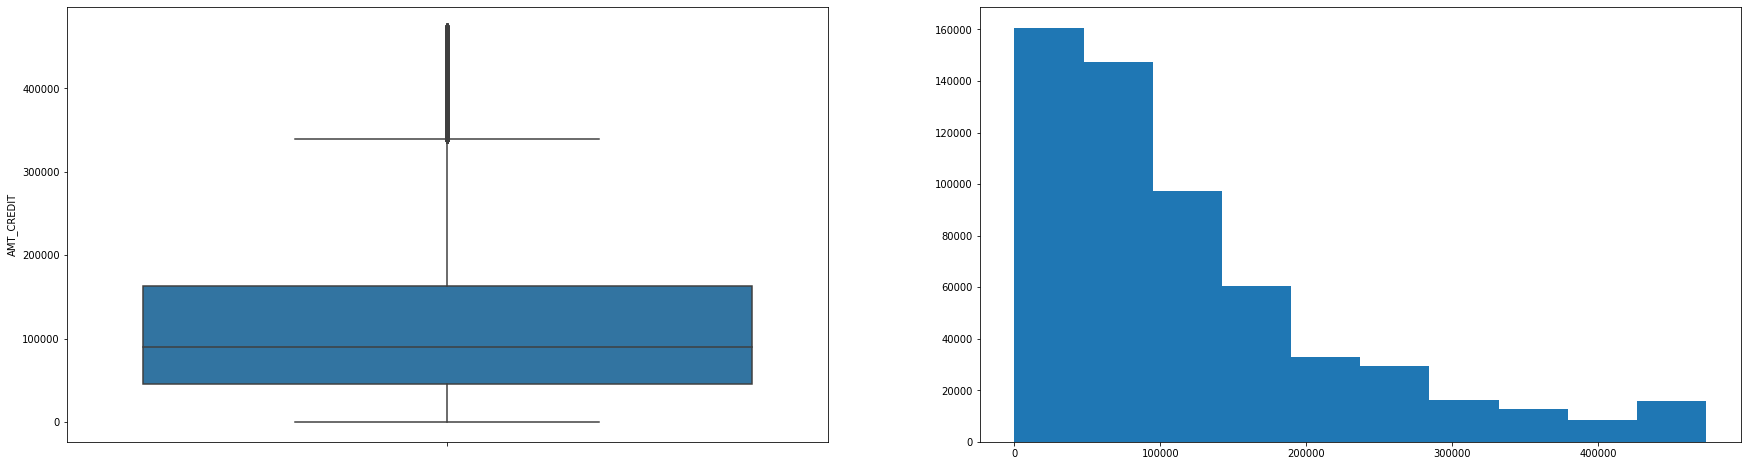

In [79]:
approved=approved[approved.AMT_CREDIT<np.nanpercentile(approved['AMT_CREDIT'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_CREDIT boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
ax.set_title('AMT_CREDIT')

C:\Users\Nmahanta\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nmahanta\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


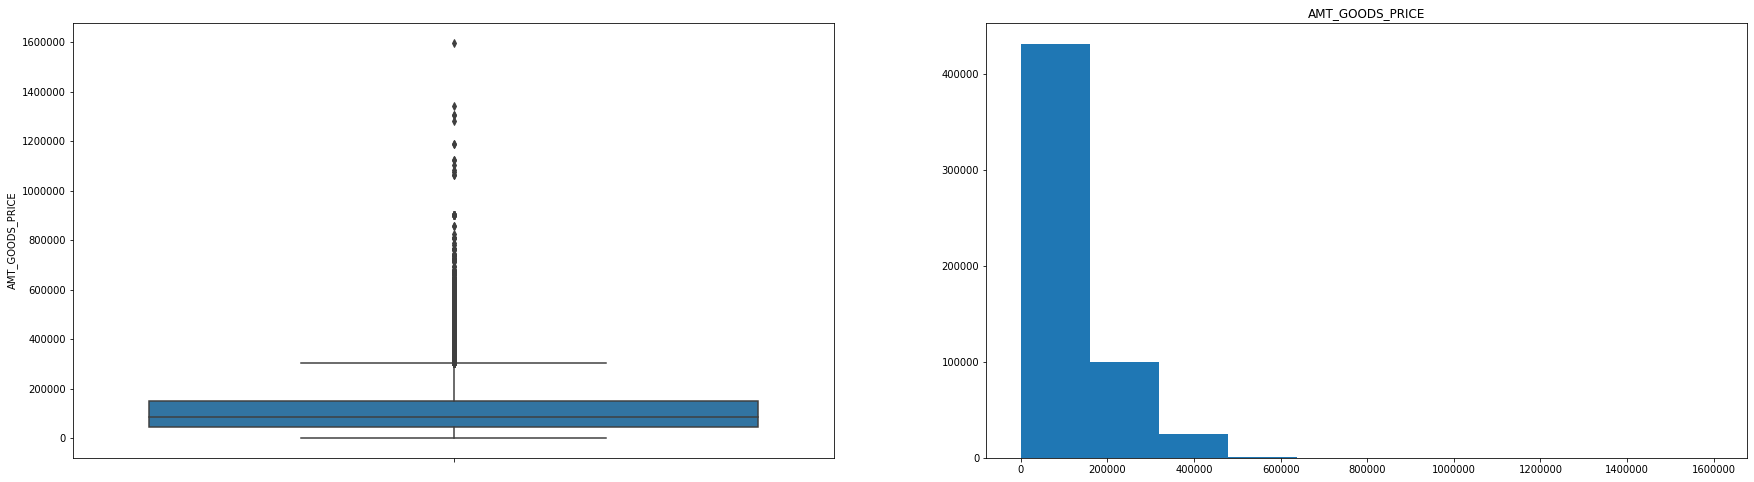

In [80]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

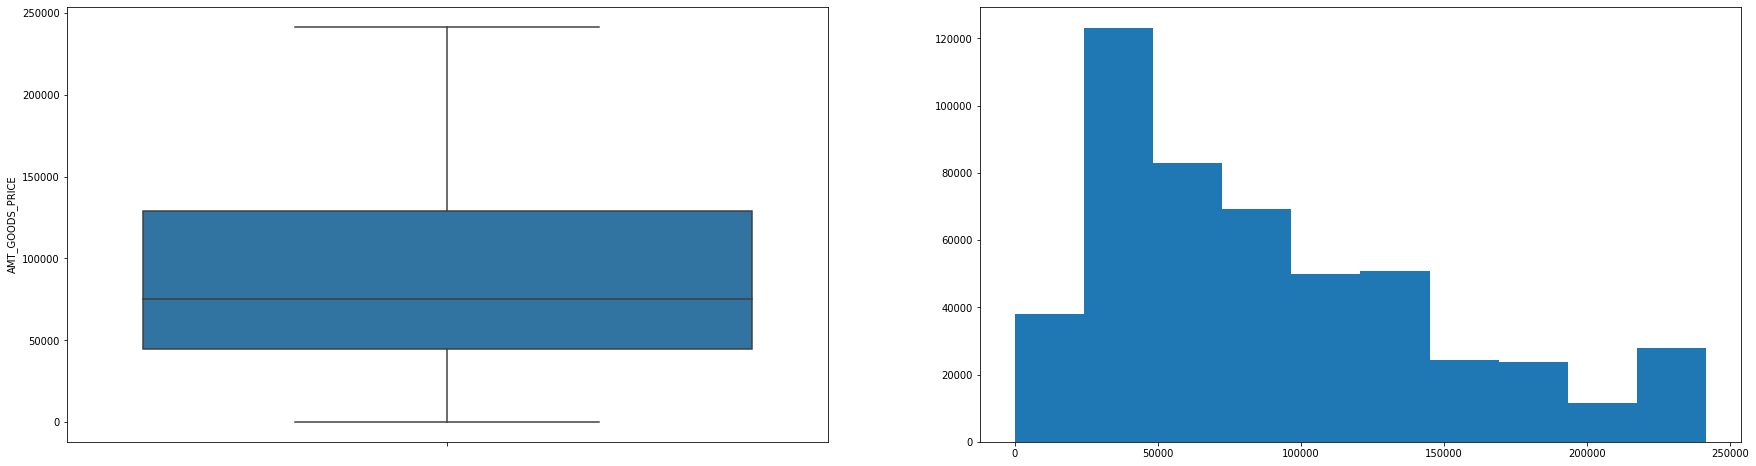

In [81]:
approved=approved[approved.AMT_GOODS_PRICE<np.nanpercentile(approved['AMT_GOODS_PRICE'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_GOODS_PRICE boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
ax.set_title('AMT_GOODS_PRICE')

BIVARIATE ANALYSIS OF VARIABLES

In [82]:
cols_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]

In [83]:
cols_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [84]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.784,-0.079,-0.081,-0.000,-0.023,-0.008,0.251,0.199,-0.151,0.050,-0.070,0.251
RATE_DOWN_PAYMENT,0.784,1.000,-0.146,-0.149,-0.008,-0.041,-0.010,-0.139,-0.123,-0.301,-0.307,-0.207,-0.139
DAYS_TERMINATION,-0.079,-0.146,1.000,0.965,0.467,0.384,-0.344,0.138,-0.059,0.009,0.154,0.477,0.138
DAYS_LAST_DUE,-0.081,-0.149,0.965,1.000,0.471,0.431,-0.306,0.137,-0.062,0.009,0.153,0.478,0.137
DAYS_LAST_DUE_1ST_VERSION,-0.000,-0.008,0.467,0.471,1.000,0.584,-0.737,0.001,-0.185,-0.371,0.006,0.231,0.001
DAYS_FIRST_DUE,-0.023,-0.041,0.384,0.431,0.584,1.000,-0.041,-0.034,-0.123,-0.222,-0.030,0.222,-0.034
DAYS_FIRST_DRAWING,-0.008,-0.010,-0.344,-0.306,-0.737,-0.041,1.000,-0.023,0.126,0.277,-0.025,-0.153,-0.023
AMT_GOODS_PRICE,0.251,-0.139,0.138,0.137,0.001,-0.034,-0.023,1.000,0.746,0.429,0.970,0.241,1.000
AMT_ANNUITY,0.199,-0.123,-0.059,-0.062,-0.185,-0.123,0.126,0.746,1.000,0.027,0.720,0.168,0.746
CNT_PAYMENT,-0.151,-0.301,0.009,0.009,-0.371,-0.222,0.277,0.429,0.027,1.000,0.498,0.045,0.429


In [85]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION            AMT_APPLICATION     1.000000
                           AMT_CREDIT          0.969563
DAYS_LAST_DUE              DAYS_TERMINATION    0.964832
RATE_DOWN_PAYMENT          AMT_DOWN_PAYMENT    0.784317
AMT_ANNUITY                AMT_APPLICATION     0.745872
AMT_CREDIT                 AMT_ANNUITY         0.720473
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE      0.584142
AMT_CREDIT                 CNT_PAYMENT         0.497904
DAYS_DECISION              DAYS_LAST_DUE       0.478385
DAYS_TERMINATION           DAYS_DECISION       0.476957
dtype: float64

In [86]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_FIRST_DRAWING         DAYS_DECISION               -0.153301
AMT_ANNUITY                DAYS_LAST_DUE_1ST_VERSION   -0.184611
RATE_DOWN_PAYMENT          DAYS_DECISION               -0.207306
CNT_PAYMENT                DAYS_FIRST_DUE              -0.222333
                           RATE_DOWN_PAYMENT           -0.300802
DAYS_FIRST_DRAWING         DAYS_LAST_DUE               -0.306059
AMT_CREDIT                 RATE_DOWN_PAYMENT           -0.306997
DAYS_FIRST_DRAWING         DAYS_TERMINATION            -0.344223
DAYS_LAST_DUE_1ST_VERSION  CNT_PAYMENT                 -0.371076
                           DAYS_FIRST_DRAWING          -0.736568
dtype: float64

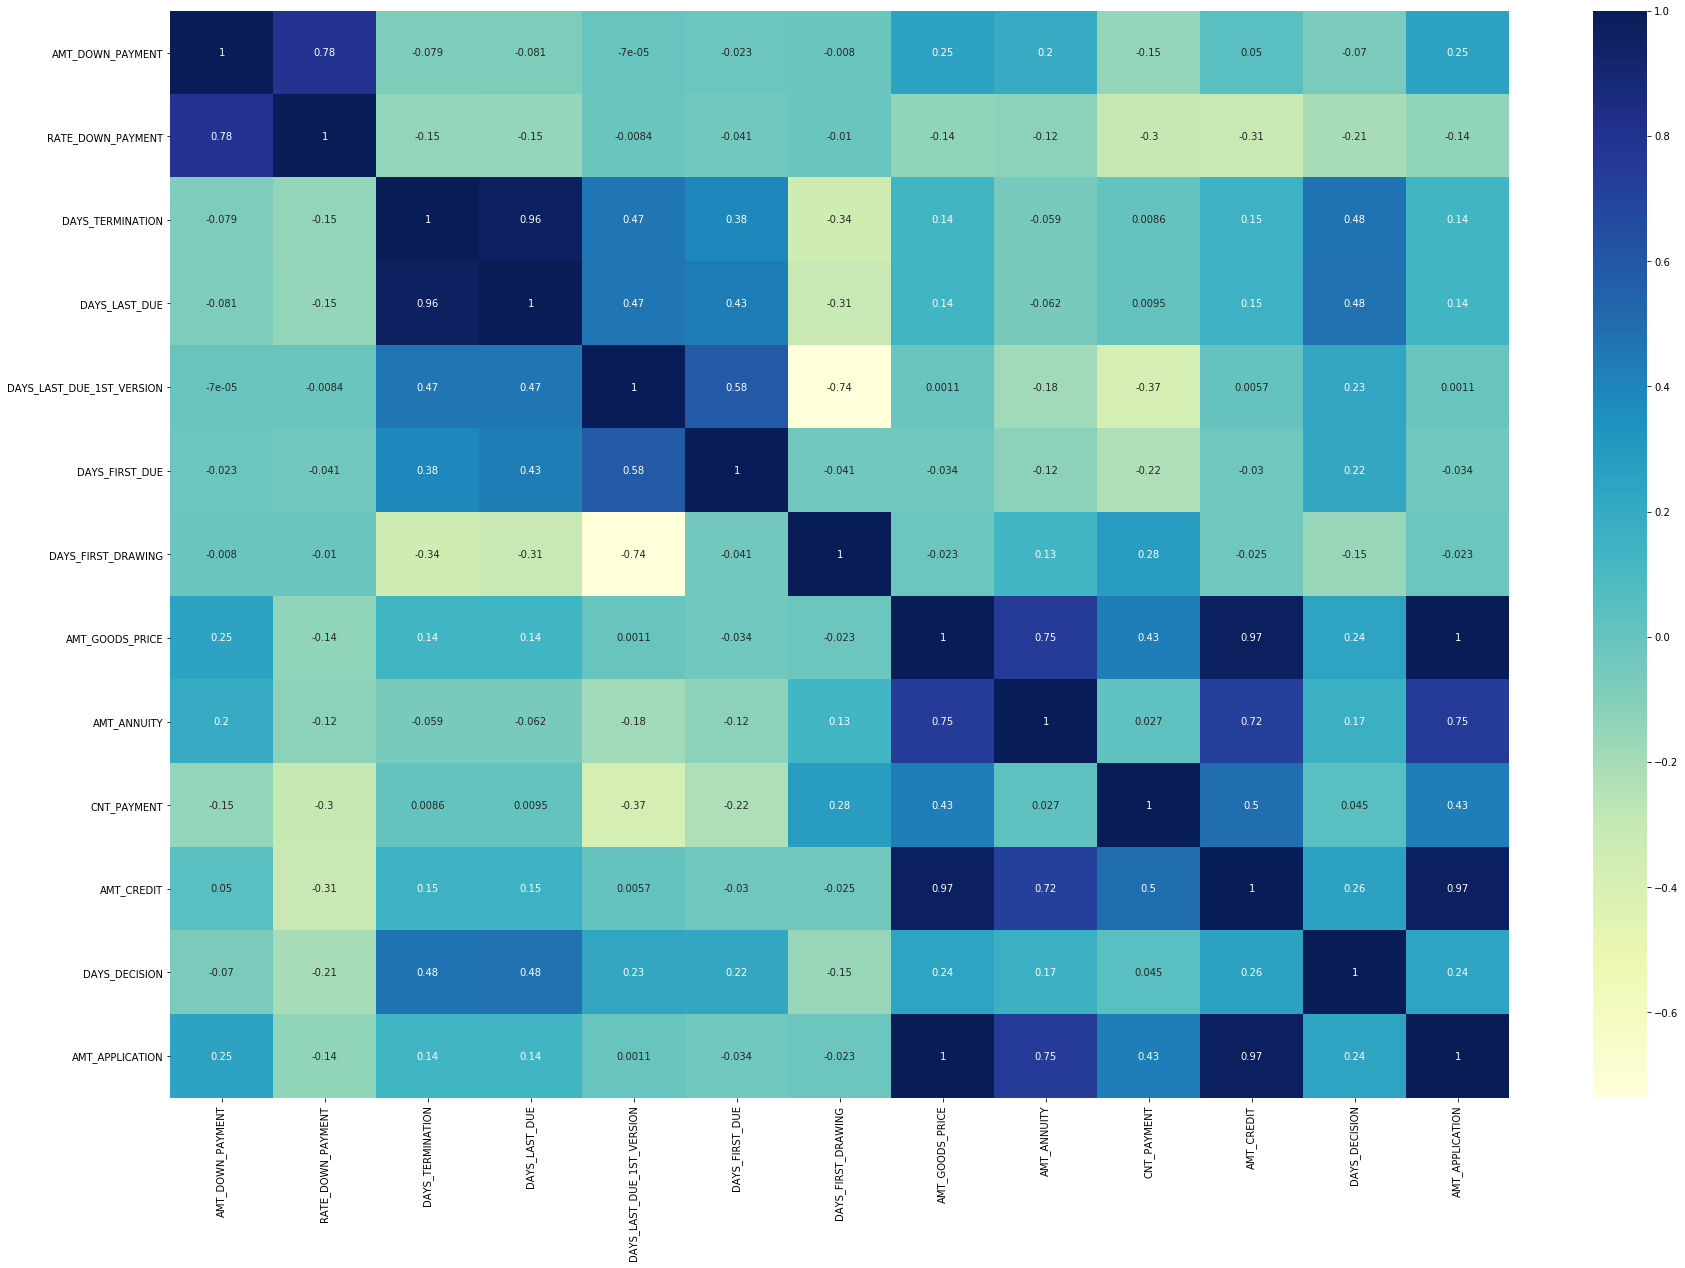

In [87]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [88]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.414,0.532,0.306,0.100,0.381,0.007,0.532
RATE_DOWN_PAYMENT,0.414,1.000,-0.021,-0.084,-0.240,-0.110,-0.228,-0.021
AMT_GOODS_PRICE,0.532,-0.021,1.000,0.821,0.658,0.992,0.333,1.000
AMT_ANNUITY,0.306,-0.084,0.821,1.000,0.426,0.818,0.286,0.816
CNT_PAYMENT,0.100,-0.240,0.658,0.426,1.000,0.678,0.303,0.670
AMT_CREDIT,0.381,-0.110,0.992,0.818,0.678,1.000,0.270,0.984
DAYS_DECISION,0.007,-0.228,0.333,0.286,0.303,0.270,1.000,0.264
AMT_APPLICATION,0.532,-0.021,1.000,0.816,0.670,0.984,0.264,1.000


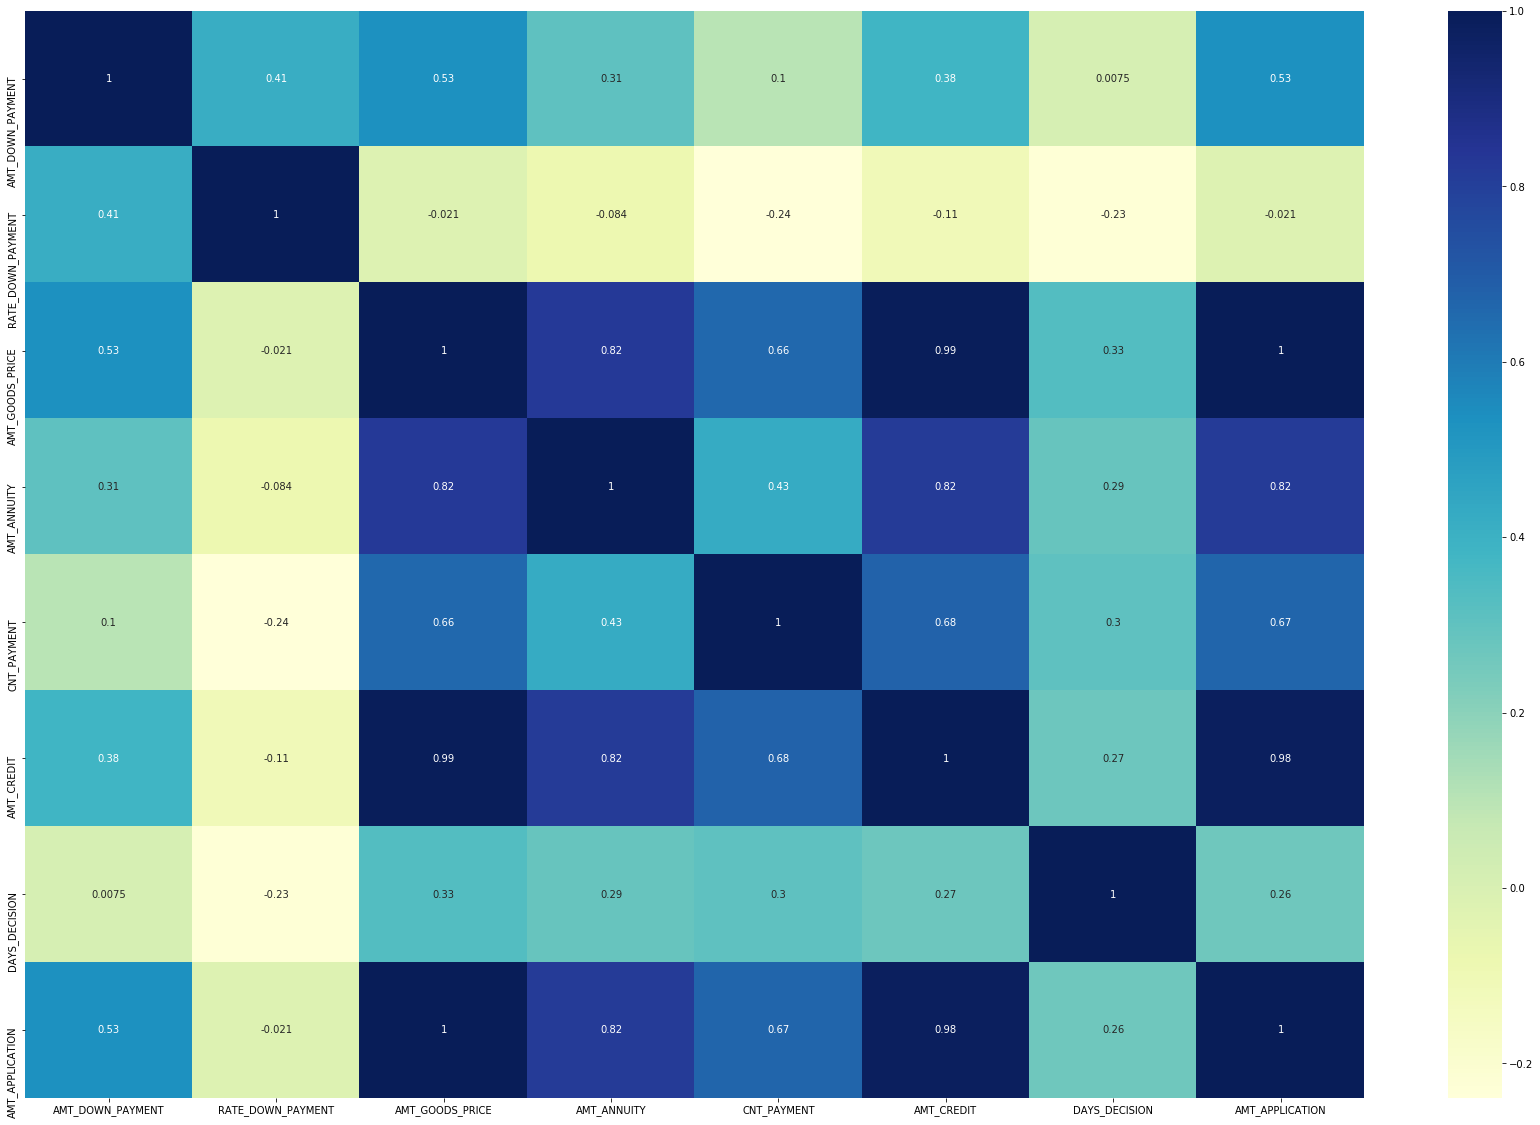

In [89]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [90]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION  AMT_APPLICATION    1.000000
AMT_GOODS_PRICE  AMT_APPLICATION    0.999711
                 AMT_CREDIT         0.991788
AMT_APPLICATION  AMT_CREDIT         0.983686
AMT_GOODS_PRICE  AMT_ANNUITY        0.821036
AMT_CREDIT       AMT_ANNUITY        0.818443
AMT_APPLICATION  AMT_ANNUITY        0.816420
AMT_CREDIT       CNT_PAYMENT        0.677555
AMT_APPLICATION  CNT_PAYMENT        0.670001
CNT_PAYMENT      AMT_GOODS_PRICE    0.658390
dtype: float64

In [91]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_DECISION      AMT_ANNUITY          0.285581
                   AMT_CREDIT           0.269567
                   AMT_APPLICATION      0.264080
AMT_DOWN_PAYMENT   CNT_PAYMENT          0.099601
DAYS_DECISION      AMT_DOWN_PAYMENT     0.007461
AMT_APPLICATION    RATE_DOWN_PAYMENT   -0.021296
AMT_ANNUITY        RATE_DOWN_PAYMENT   -0.083659
RATE_DOWN_PAYMENT  AMT_CREDIT          -0.109778
                   DAYS_DECISION       -0.227965
                   CNT_PAYMENT         -0.239599
dtype: float64

In [109]:
def has_terminated(x):
    if x < 0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'
    
approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated) 

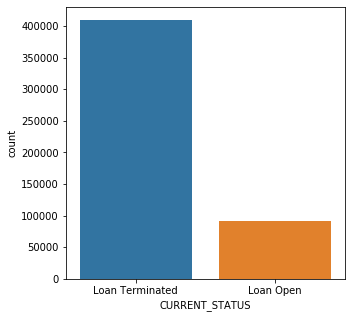

In [110]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

### MERGING PREVIOUS DATA WITH CURRENT DATA
##ANALYSIS OF MERGED DATA

In [95]:
all_applications=pd.merge(curr_app,previous_data,how='inner',on='SK_ID_CURR')

In [96]:
all_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NAME_TYPE_SUITE_y,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,CNT_PAYMENT,PRODUCT_COMBINATION,CHANNEL_TYPE,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,SK_ID_PREV,NAME_CLIENT_TYPE,CODE_REJECT_REASON,DAYS_DECISION,NAME_CONTRACT_STATUS,NAME_CASH_LOAN_PURPOSE,NFLAG_LAST_APPL_IN_DAY,FLAG_LAST_APPL_PER_CONTRACT,HOUR_APPR_PROCESS_START_y,WEEKDAY_APPR_PROCESS_START_y,AMT_CREDIT_y,AMT_APPLICATION,NAME_CONTRACT_TYPE_y,NAME_PAYMENT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,NaN,0.0,365243.0,-565.0,125.0,-25.0,-17.0,179055.0,9251.775,24.0,POS other with interest,Stone,XNA,low_normal,500,Auto technology,Vehicles,POS,1038818,New,XAP,-606,Approved,XAP,1,Y,9,SATURDAY,179055.0,179055.0,Consumer loans,XNA
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Unaccompanied,1.0,365243.0,-716.0,-386.0,-536.0,-527.0,900000.0,98356.995,12.0,Cash X-Sell: low,Credit and cash offices,x-sell,low_normal,-1,XNA,XNA,Cash,1810518,Repeater,XAP,-746,Approved,XNA,1,Y,12,FRIDAY,1035882.0,900000.0,Cash loans,XNA
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Family,0.0,365243.0,-797.0,-647.0,-647.0,-639.0,337500.0,64567.665,6.0,POS industry with interest,Stone,XNA,middle,1400,Furniture,Furniture,POS,2636178,Refreshed,XAP,-828,Approved,XAP,1,Y,17,SUNDAY,348637.5,337500.0,Consumer loans,Cash through the bank
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212008,4860.0,Unaccompanied,0.0

UNIVARIATE ANALYSIS OF MERGED DATA

In [97]:
# Dividing the Data into two parts for Target=0 and Target=1
#df0 is for TARGET=0
df0 = all_applications[all_applications['TARGET'] == 0]
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NAME_TYPE_SUITE_y,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,CNT_PAYMENT,PRODUCT_COMBINATION,CHANNEL_TYPE,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,SK_ID_PREV,NAME_CLIENT_TYPE,CODE_REJECT_REASON,DAYS_DECISION,NAME_CONTRACT_STATUS,NAME_CASH_LOAN_PURPOSE,NFLAG_LAST_APPL_IN_DAY,FLAG_LAST_APPL_PER_CONTRACT,HOUR_APPR_PROCESS_START_y,WEEKDAY_APPR_PROCESS_START_y,AMT_CREDIT_y,AMT_APPLICATION,NAME_CONTRACT_TYPE_y,NAME_PAYMENT_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Unaccompanied,1.0,365243.0,-716.0,-386.0,-536.0,-527.0,900000.0,98356.995,12.0,Cash X-Sell: low,Credit and cash offices,x-sell,low_normal,-1,XNA,XNA,Cash,1810518,Repeater,XAP,-746,Approved,XNA,1,Y,12,FRIDAY,1035882.0,900000.0,Cash loans,XNA
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,Family,0.0,365243.0,-797.0,-647.0,-647.0,-639.0,337500.0,64567.665,6.0,POS industry with interest,Stone,XNA,middle,1400,Furniture,Furniture,POS,2636178,Refreshed,XAP,-828,Approved,XAP,1,Y,17,SUNDAY,348637.5,337500.0,Consumer loans,Cash through the bank
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212008,4860.0,Unaccompanied,0.0,365243.0,-784.0,-694.0,-724.0,-714.0,24282.0,5357.250,4.0,POS mobile without interest,Regional / Local,XNA,middle,30,Connectivity,Mobile,POS,1564014,New,XAP,-815,Approved,XAP,1,Y,5,FRIDAY,20106.0,24282.0,Consumer loans,Cash through the bank
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Un

In [98]:
#df1 is for TARGET=1
df1 = all_applications[all_applications['TARGET'] == 1]
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NAME_TYPE_SUITE_y,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,CNT_PAYMENT,PRODUCT_COMBINATION,CHANNEL_TYPE,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,SK_ID_PREV,NAME_CLIENT_TYPE,CODE_REJECT_REASON,DAYS_DECISION,NAME_CONTRACT_STATUS,NAME_CASH_LOAN_PURPOSE,NFLAG_LAST_APPL_IN_DAY,FLAG_LAST_APPL_PER_CONTRACT,HOUR_APPR_PROCESS_START_y,WEEKDAY_APPR_PROCESS_START_y,AMT_CREDIT_y,AMT_APPLICATION,NAME_CONTRACT_TYPE_y,NAME_PAYMENT_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,NaN,0.0,365243.0,-565.0,125.0,-25.0,-17.0,179055.0,9251.775,24.0,POS other with interest,Stone,XNA,low_normal,500,Auto technology,Vehicles,POS,1038818,New,XAP,-606,Approved,XAP,1,Y,9,SATURDAY,179055.0,179055.0,Consumer loans,XNA
104,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,NaN,NaN,NaN,0.0,365243.0,365243.0,365243.0,365243.0,365243.0,NaN,22500.000,0.0,Card X-Sell,Credit and cash offices,x-sell,XNA,-1,XNA,XNA,Cards,1472630,Repeater,XAP,-1172,Approved,XAP,1,Y,14,SATURDAY,450000.0,0.0,Revolving loans,XNA
105,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,NaN,NaN,Family,1.0,365243.0,-1437.0,-747.0,-1167.0,-1163.0,157500.0,11117.700,24.0,Cash X-Sell: high,Credit and cash offices,x-sell,high,-1,XNA,XNA,Cash,2426800,Refreshed,XAP,-1467,Approved,XNA,1,Y,15,FRIDAY,157500.0,157500.0,Cash loans,Cash through the bank
106,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.

UNIVARIATE ANALYSIS
UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES 

In [99]:
df0 = df0.replace({"Single / not married":"Unmarried"})
df1 = df1.replace({"Single / not married":"Unmarried"})

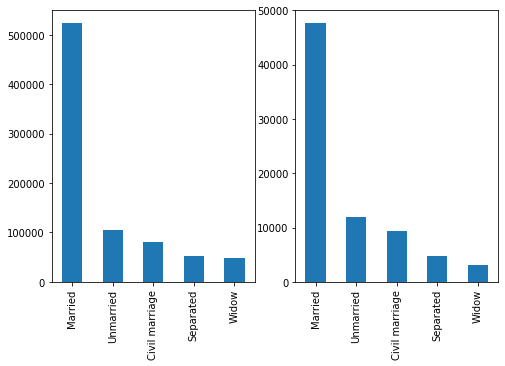

In [100]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df0.NAME_FAMILY_STATUS.value_counts().plot.bar()

plt.subplot(1,2,2)
df1.NAME_FAMILY_STATUS.value_counts().plot.bar()
plt.show()

Ratio of married people is more in the left graph.

Widow people are more likely to have payment difficulties

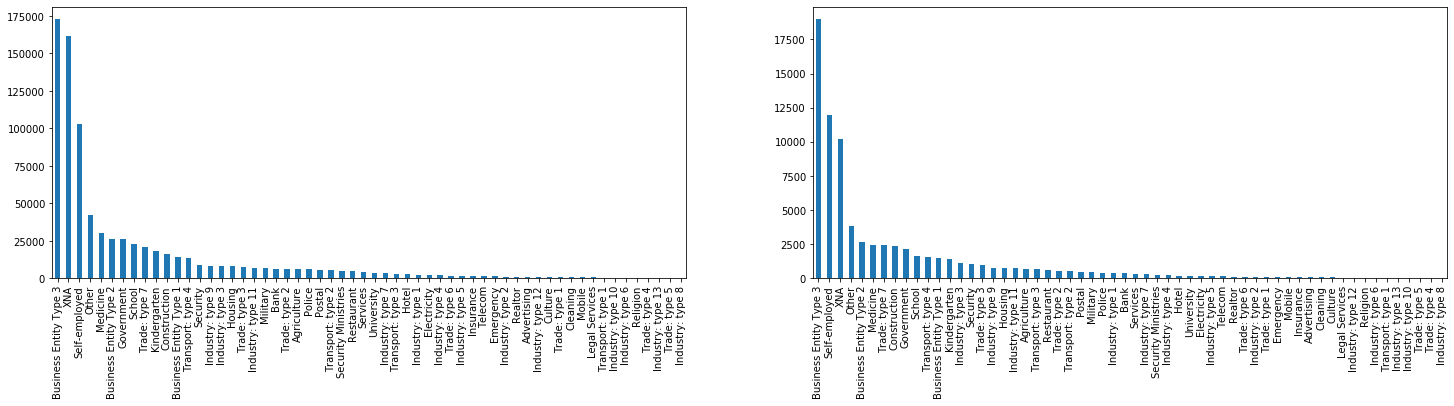

In [101]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
df0.ORGANIZATION_TYPE.value_counts().plot.bar()

plt.subplot(1,2,2)
df1.ORGANIZATION_TYPE.value_counts().plot.bar()

plt.show()

In [111]:
Most of the people whether defaulter or reapayer work for business entity type 3

SyntaxError: invalid syntax (<ipython-input-111-a7680de46f0a>, line 1)

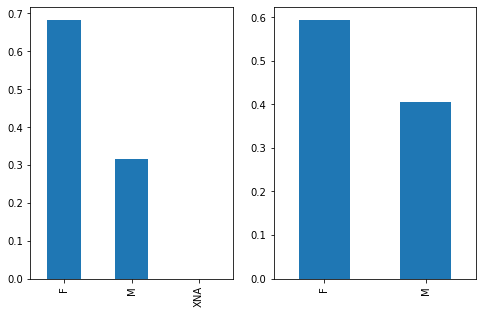

In [102]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df0.CODE_GENDER.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
df1.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
Number of the people who applied for loan are more females than males.

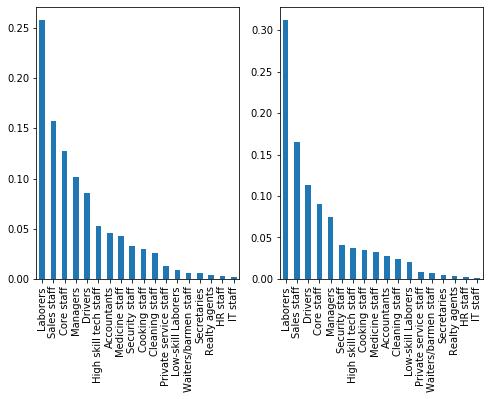

In [103]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df0.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
df1.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

Ratio of labourer in both cases are same.

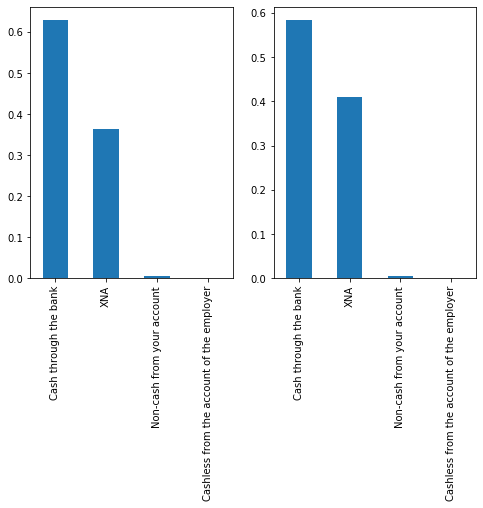

In [106]:
#NAME_PAYMENT_TYPE
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df0.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
df1.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

UNIVARIATE ANALYSIS FOR NUMERICAL VARIABLE

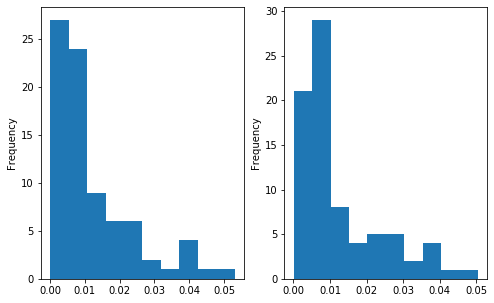

In [107]:
#REGION_POPULATION_RELATIVE
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df0.REGION_POPULATION_RELATIVE.value_counts(normalize=True).plot.hist()

plt.subplot(1,2,2)
df1.REGION_POPULATION_RELATIVE.value_counts(normalize=True).plot.hist()
plt.show()

####BIVARIATE ANALYSIS FOR MERGED DATA

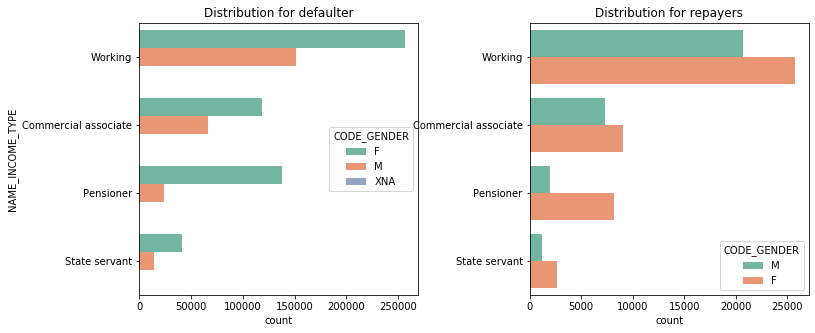

In [112]:
# CATEGORICAL VS CATEGORICAL
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(y=df0["NAME_INCOME_TYPE"],
              hue=df0["CODE_GENDER"],palette="Set2",
              order=df0["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution for defaulter")

plt.subplot(122)
sns.countplot(y=df1["NAME_INCOME_TYPE"],
              hue=df1["CODE_GENDER"],
              palette="Set2",
              order=df1["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution for repayers")
plt.subplots_adjust(wspace = .4)


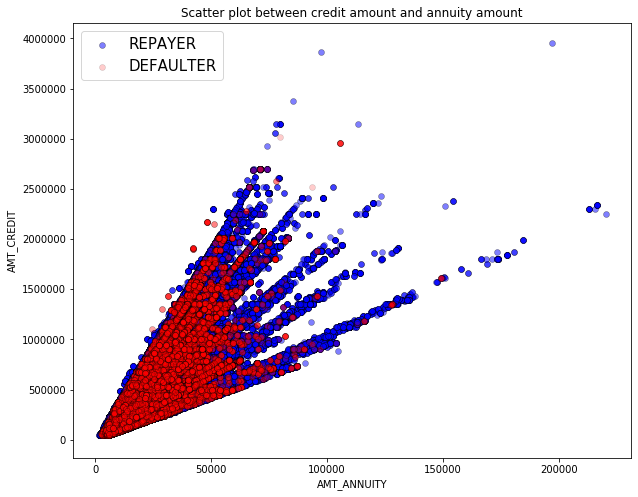

In [113]:
# CONTINUOUS VS CONTINUOUS
fig = plt.figure(figsize=(10,8))
plt.scatter(df0['AMT_ANNUITY_x'],df0['AMT_CREDIT_x'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(df1['AMT_ANNUITY_x'],df1['AMT_CREDIT_x'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

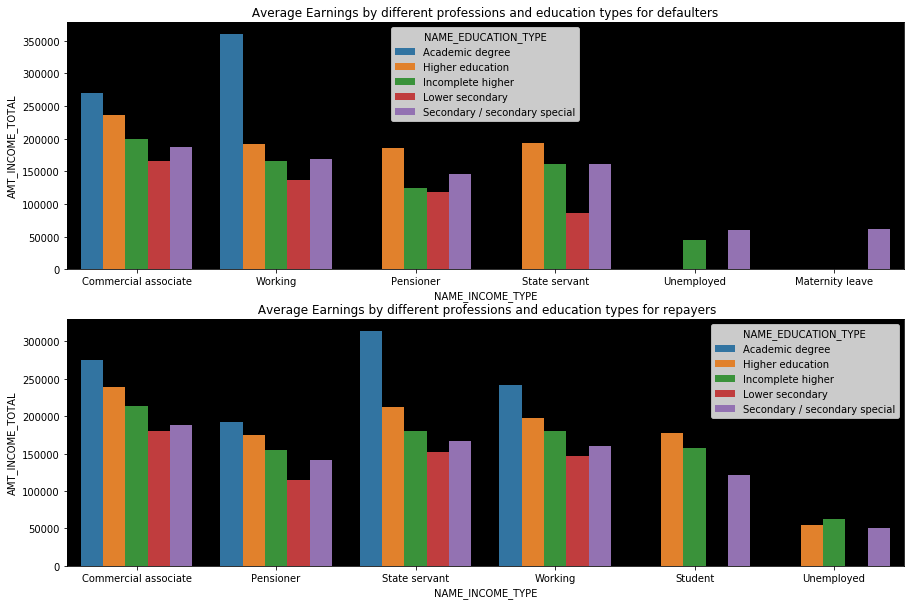

In [114]:
plt.figure(figsize=(15,10))
plt.subplot(211)
edu = df1.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index()
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE')
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types for defaulters ")

plt.subplot(212)
edu = df0.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index()
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE')
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types for repayers")

plt.show()

In [115]:
#Most of the repayers are working while most of the defaulter are state-servant.

In [116]:
new_df= previous_data.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')
new_df=new_df.reset_index(drop=False)
new_df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)

In [117]:
df1=pd.merge(new_df, pd.DataFrame(curr_app[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [ ]:
merged_df1=merged_df1[merged_df1['Count of Refused Loans']!=0]

In [ ]:
merged_df1.head()


In [ ]:
merged_df1[merged_df1['TARGET']==0].head()

In [ ]:
The above data gives you ID of the person whose loan has been refused previously because they are not able to repay the loan.